# Individual Exploration Abby: Path 2 - Strategy Execution Analysis

## INSY 6500 – Individual Exploration (Path 2)

### Analyst: Abby Tucker
**Objective:** To conduct a comprehensive analysis of the cleaned dataset to identify meaningful patterns, explore relationships among key variables, and generate insights that support informed decision-making and operational understanding.

**Datasets:**
- `performance_forecast_clean.cvs` a cleaned and merged data set

---

# Path 2: Strategy Execution Analysis  
This analysis compares *planned* preventive maintenance (PM) activities to their *actual historical execution*.  
The goal is to understand how accurately maintenance work is planned, where execution breaks down, and what factors drive discrepancies.

**Guiding Research Questions**
1. **Q1 — How well do plans match reality?**  
   - Compare planned vs. actual hours  
   - Measure planning bias  
   - Evaluate accuracy across PM characteristics  
2. **Q2 — Where are our planning blind spots?**  
   - Identify groups with low completion or poor execution  
   - Compare characteristics across job type, craft, and department  
3. **Q3 — When and why do PMs fail?**  
   - Detect PMs with low completion performance  
   - Explore root causes such as interval, job type, or complexity  



## Step 1 Imports & Load Data 

##### 1.1 Imports 

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

print("Libraries imported")

Libraries imported


##### 1.2 Load Cleanned Data Set 

In [2]:
#loading data 
OUTPUTS_DIR = Path('../outputs')
IMPORT_PKL = OUTPUTS_DIR / 'performance_forecast_clean.pkl'

print("Looking for:", IMPORT_PKL.resolve())
performance_forecast = pd.read_pickle(IMPORT_PKL)

print("Imported shape:", performance_forecast.shape)
performance_forecast.head()


print("Imported pickle shape:", performance_forecast.shape)
performance_forecast.info()
df = performance_forecast

Looking for: C:\Users\Abigail\insy6500\projects\class_project\project_repo\py4eda-project\outputs\performance_forecast_clean.pkl
Imported shape: (102021, 31)
Imported pickle shape: (102021, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102021 entries, 0 to 102020
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   PMNUM                   102021 non-null  object        
 1   TIMES_SCHEDULED         96156 non-null   float64       
 2   TIMES_ONTIME            96156 non-null   float64       
 3   TIMES_LATE              96156 non-null   float64       
 4   TIMES_NOT_COMPLETED     96156 non-null   float64       
 5   AVG_PLANNED_HRS         96068 non-null   float64       
 6   AVG_ACTUAL_HRS          96060 non-null   float64       
 7   DUE_DATE                99983 non-null   datetime64[ns]
 8   COUNTKEY                99983 non-null   object        
 9   PMDESCRIPTION      

## Step 2 Feature Engineering for Path 2
To evaluate planning accuracy and execution performance, we engineer several key indicators from the cleaned dataset.
#### 1. On-Time Rate
Measures how often tasks are completed on or before their scheduled date.  
`on_time_rate = TIMES_ONTIME / TIMES_SCHEDULED`
#### 2. Completion Rate
Defines what percentage of scheduled tasks were actually completed.  
`completion_rate = (SCHEDULED - NOT_COMPLETED) / SCHEDULED`
#### 3. Hour Deviation Percentage
Quantifies planning accuracy by comparing actual vs. planned labor hours.  
`hour_deviation_pct = (ACTUAL - PLANNED) / PLANNED`  
Positive values indicate **under-planning**, negative values indicate **over-planning**.
#### 4. Task Density & Complexity
Task and description complexity indicators provide context for why some PMs require more labor, time, or planning accuracy.
* **Task Density:** `tasks_per_hour = TASK_COUNT / PLANNED_LABOR_HOURS`
* **Description Intensity:** `desc_chars_per_task = TOTAL_TASK_DESC_LENGTH / TASK_COUNT`
#### 5. Performance Tier Segmentation
Categorizes PMs into **High / Medium / Low** completion performance groups.  
Useful for comparing best vs worst execution contexts.


##### 2.1 On Time Rate 

In [3]:
pf = df.copy()

pf['on_time_rate'] = pf['TIMES_ONTIME'] / pf['TIMES_SCHEDULED'] 

pf[['on_time_rate', 'TIMES_ONTIME', 'TIMES_SCHEDULED']]


,on_time_rate,TIMES_ONTIME,TIMES_SCHEDULED
0,1.00,1.0,1.0
1,0.00,0.0,1.0
2,1.00,1.0,1.0
3,0.96,48.0,50.0
4,0.96,48.0,50.0
...,...,...,...
102016,NaN,NaN,NaN
102017,NaN,NaN,NaN
102018,NaN,NaN,NaN
102019,NaN,NaN,NaN


##### 2.2 Completion Rate

In [4]:
# completion_rate = (SCHEDULED - NOT_COMPLETED) / SCHEDULED

pf['completion_rate'] = (pf['TIMES_SCHEDULED'] - pf['TIMES_NOT_COMPLETED']) / pf['TIMES_SCHEDULED']

pf[['completion_rate', 'TIMES_SCHEDULED', 'TIMES_NOT_COMPLETED']]

,completion_rate,TIMES_SCHEDULED,TIMES_NOT_COMPLETED
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,1.0,50.0,0.0
4,1.0,50.0,0.0
...,...,...,...
102016,NaN,NaN,NaN
102017,NaN,NaN,NaN
102018,NaN,NaN,NaN
102019,NaN,NaN,NaN


##### 2.3 Hour Deviation Percentage

In [5]:
# Positive values indicate under-planning, negative values indicate over-planning.
pf['hour_deviation_pct'] = ((pf['AVG_ACTUAL_HRS'] - pf['AVG_PLANNED_HRS']) / pf['AVG_PLANNED_HRS'].replace(0, np.nan))

pf[['hour_deviation_pct', 'AVG_ACTUAL_HRS', 'AVG_PLANNED_HRS']]

,hour_deviation_pct,AVG_ACTUAL_HRS,AVG_PLANNED_HRS
0,-0.500,8.000000,16.000000
1,0.000,3.000000,3.000000
2,0.000,2.583333,2.583333
3,5.416,1.604000,0.250000
4,5.416,1.604000,0.250000
...,...,...,...
102016,NaN,NaN,NaN
102017,NaN,NaN,NaN
102018,NaN,NaN,NaN
102019,NaN,NaN,NaN


##### 2.4 Task Density and Complexity
* **Task Density:** `tasks_per_hour = TASK_COUNT / PLANNED_LABOR_HOURS`
* **Description Intensity:** `desc_chars_per_task = TOTAL_TASK_DESC_LENGTH / TASK_COUNT`

##### 2.4.1 Task Density 

In [6]:
pf['task_density'] = (pf['TASK_COUNT'] / pf['total_labor_hrs'].replace(0, np.nan))

pf[['task_density', 'TASK_COUNT', 'total_labor_hrs']]

,task_density,TASK_COUNT,total_labor_hrs
0,0.875000,14.0,16.000000
1,6.000000,18.0,3.000000
2,5.032258,13.0,2.583333
3,20.000000,5.0,0.250000
4,20.000000,5.0,0.250000
...,...,...,...
102016,7.000000,14.0,2.000000
102017,7.000000,14.0,2.000000
102018,7.000000,14.0,2.000000
102019,7.000000,14.0,2.000000


##### 2.4.2 Intensitity Description

In [7]:
pf['desc_intensity'] = (pf['TOTAL_TASK_DESC_LENGTH'] / pf['TASK_COUNT'].replace(0, np.nan))

pf[['desc_intensity', 'TOTAL_TASK_DESC_LENGTH', 'TASK_COUNT']]

,desc_intensity,TOTAL_TASK_DESC_LENGTH,TASK_COUNT
0,31.357143,439.0,14.0
1,29.277778,527.0,18.0
2,34.153846,444.0,13.0
3,38.000000,190.0,5.0
4,38.000000,190.0,5.0
...,...,...,...
102016,36.000000,504.0,14.0
102017,36.000000,504.0,14.0
102018,36.000000,504.0,14.0
102019,36.000000,504.0,14.0


##### 2.4.3 Complexity Score 

In [8]:
# Aggregate total labor hours per PM occurrence (sum across all crafts)
pf['total_labor_per_occurrence'] = pf.groupby('COUNTKEY')['total_labor_hrs'].transform('sum')

from sklearn.preprocessing import MinMaxScaler
# Complexity score (normalized composite)
# SKlearn min-max scaling
scaler = MinMaxScaler()

# Define complexity components
complexity_components = pf[['task_density', 'total_labor_per_occurrence', 'desc_intensity']]
normalized = scaler.fit_transform(complexity_components)

# Averaged together
pf['complexity_score'] = normalized.mean(axis=1)

print("\n-> Complexity Score Summary:")
display(pf['complexity_score'].describe())


-> Complexity Score Summary:


count    93325.000000
mean         0.147888
std          0.053814
min          0.002264
25%          0.111242
50%          0.139365
75%          0.186540
max          0.472335
Name: complexity_score, dtype: float64

##### 2.5 Performance Tier Creation

In [9]:
def classify_tier(r):
    cr = r['completion_rate']
    if pd.isna(cr):
        return 'UNKNOWN'
    if cr >= 0.90:
        return 'HIGH'
    elif cr >= 0.75:
        return 'MEDIUM'
    else:
        return 'LOW'

pf['performance_tier'] = pf.apply(classify_tier, axis=1)

pf[['on_time_rate','completion_rate','hour_deviation_pct','performance_tier']].head()

,on_time_rate,completion_rate,hour_deviation_pct,performance_tier
0,1.00,1.0,-0.500,HIGH
1,0.00,1.0,0.000,HIGH
2,1.00,1.0,0.000,HIGH
3,0.96,1.0,5.416,HIGH
4,0.96,1.0,5.416,HIGH


### Step 3 Answering Question 1
### Q1 — How Well Do Plans Match Reality?
Here, we assess the extent to which planned maintenance aligns with real-world execution.
### Key Analyses
- **Planned vs Actual Hours**  
  Understand whether maintenance work is consistently under-planned, over-planned, or accurate.
  
- **Planning Bias Patterns**  
  Detect systematic errors in planning across different job types, Departments, and labor crafts.
  
- **Accuracy by Category**  
  Identify which groups (e.g., INTERVAL, JOB_TYPE, LABOR_CRAFT) tend to deviate the most from planned labor estimates.

Together, these analyses reveal the strengths and weaknesses of planning accuracy in the PM workflow.


##### 3.1 Planed vs Actual Hours 

Planned vs Actual Summary


,AVG_PLANNED_HRS,AVG_ACTUAL_HRS,hour_deviation_pct
count,96068.000000,96060.000000,95545.000000
mean,1.834433,1.628607,-0.006956
std,5.181891,4.022954,0.605348
min,0.000000,0.000000,-1.000000
25%,0.500000,0.500000,-0.125000
50%,1.000000,0.916667,0.000000
75%,2.000000,1.681667,0.000000
max,125.000000,107.854167,25.000000


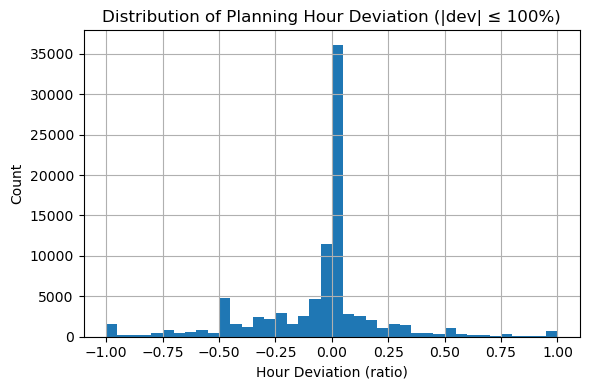

In [10]:
print("Planned vs Actual Summary")
display(pf[['AVG_PLANNED_HRS', 'AVG_ACTUAL_HRS', 'hour_deviation_pct']].describe())

mask = np.isfinite(pf['hour_deviation_pct']) & pf['hour_deviation_pct'].between(-1, 1)

plt.figure(figsize=(6, 4))
pf.loc[mask, 'hour_deviation_pct'].hist(bins=40)
plt.title('Distribution of Planning Hour Deviation (|dev| ≤ 100%)')
plt.xlabel('Hour Deviation (ratio)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Takeaways 
* For the most part the planning seems to be accurate with some under planning and some over planning 

##### 3.2 Planning Bias Patterns 
Bias = When planners systematically underestimate or overestimate.

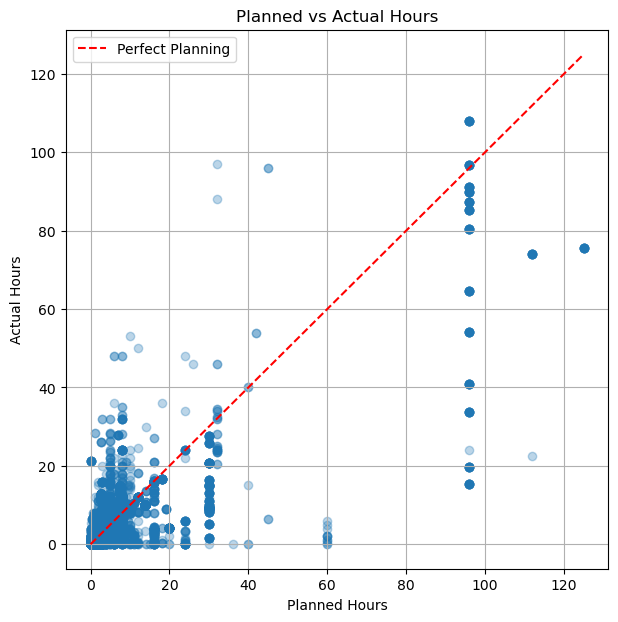

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(pf['AVG_PLANNED_HRS'], pf['AVG_ACTUAL_HRS'], alpha=0.3)
plt.plot([0, pf['AVG_PLANNED_HRS'].max()],
         [0, pf['AVG_PLANNED_HRS'].max()], 'r--', label='Perfect Planning')
plt.title('Planned vs Actual Hours')
plt.xlabel('Planned Hours')
plt.ylabel('Actual Hours')
plt.legend()
plt.grid(True)
plt.show()


##### 3.2.1 Bias by Job Type


Planning Bias by JOB_TYPE:


,n,avg_planned,avg_actual,avg_bias
JOB_TYPE,,,,
ADJUSTMENT,2400,1.441607,1.443844,0.102788
PREDICTIVE,2180,1.755841,1.579739,0.016104
INSPECTION,13672,1.694593,1.551192,-0.009794
NONASSET,121,12.468711,8.962084,-0.051034
REPAIR,293,0.964423,0.811572,-0.114347


<Figure size 1000x500 with 0 Axes>

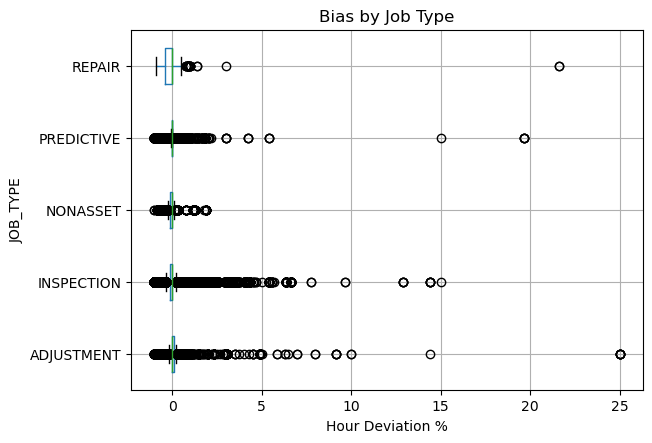

In [12]:
bias_by_job = (pf.groupby('JOB_TYPE', observed=True)
    .agg(n=('PMNUM','nunique'),
         avg_planned=('AVG_PLANNED_HRS','mean'),
         avg_actual=('AVG_ACTUAL_HRS','mean'),
         avg_bias=('hour_deviation_pct','mean'))
    .sort_values('avg_bias', ascending=False))

print("\nPlanning Bias by JOB_TYPE:")
display(bias_by_job)

plt.figure(figsize=(10,5))
pf.boxplot(column='hour_deviation_pct', by='JOB_TYPE', vert=False)
plt.title('Bias by Job Type')
plt.suptitle('')
plt.xlabel('Hour Deviation %')
plt.show()


### Takeaways
* Job types appear to cluster near perfect planning
* Repair appear to have been overplanned the most with an average bias of -11%
* Adjustments appear to have been underplanned the most, with an average bias of 10%

##### 3.2.2 Bias by Labor Craft 


Planning Bias by LABOR_CRAFT:


,n,avg_bias,avg_planned,avg_actual
LABOR_CRAFT,,,,
PLTSME,1,1.766667,0.428571,1.185714
DIESERV,225,1.728234,5.055970,13.513060
ESDIE,23,1.706667,3.000000,8.120000
QUALA,6,0.500487,2.402381,4.571429
EGMULT,9,0.260714,0.460784,0.642565
EGIND,1,0.188889,0.500000,0.594444
ESMAN,29,0.162791,1.000000,1.162791
EGMECH,156,0.156407,4.421317,4.273219
CONTMECH,71,0.113936,1.814534,1.858024


<Figure size 1200x600 with 0 Axes>

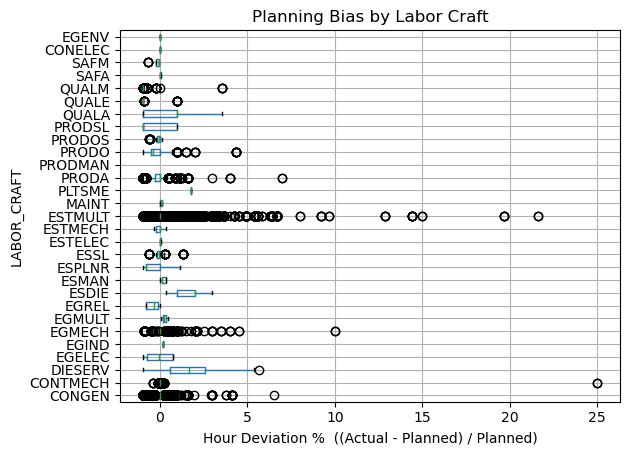

In [13]:
bias_by_craft = (pf.groupby('LABOR_CRAFT', observed=True)
    .agg(n=('PMNUM','nunique'),
         avg_bias=('hour_deviation_pct','mean'),
         avg_planned=('AVG_PLANNED_HRS','mean'),
         avg_actual=('AVG_ACTUAL_HRS','mean'),)
                 
    .sort_values('avg_bias', ascending=False))

print("\nPlanning Bias by LABOR_CRAFT:")
display(bias_by_craft)

plt.figure(figsize=(12, 6))
pf.boxplot(column='hour_deviation_pct', by='LABOR_CRAFT', vert=False)

plt.title('Planning Bias by Labor Craft')
plt.suptitle('')
plt.xlabel('Hour Deviation %  ((Actual - Planned) / Planned)')
plt.tight_layout()
plt.show()


### Takeaways
* There is a wide distribution of planning bias by Department. 

##### 3.2.3 Bias by Department 


Planning Bias by Department:


,n,avg_planned,avg_actual,avg_bias
DEPT,,,,
1PO,101,1.914661,3.841147,1.834686
1ME,1,0.428571,1.185714,1.766667
3DC,196,2.056280,2.614700,0.604983
1VQ,209,1.405112,1.669522,0.254074
2VQ,155,1.683297,1.812342,0.180334
1ST,566,3.208965,3.963036,0.160088
1BP,236,1.192401,1.287287,0.136832
3AE,1566,3.926932,2.639360,0.064510
1WE,3914,1.960626,1.622097,0.047801


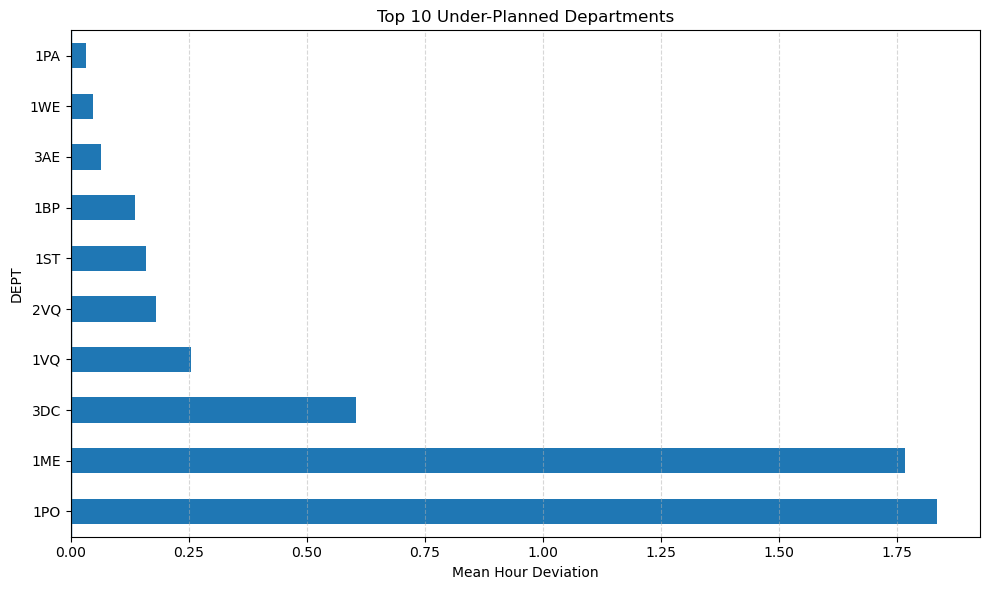

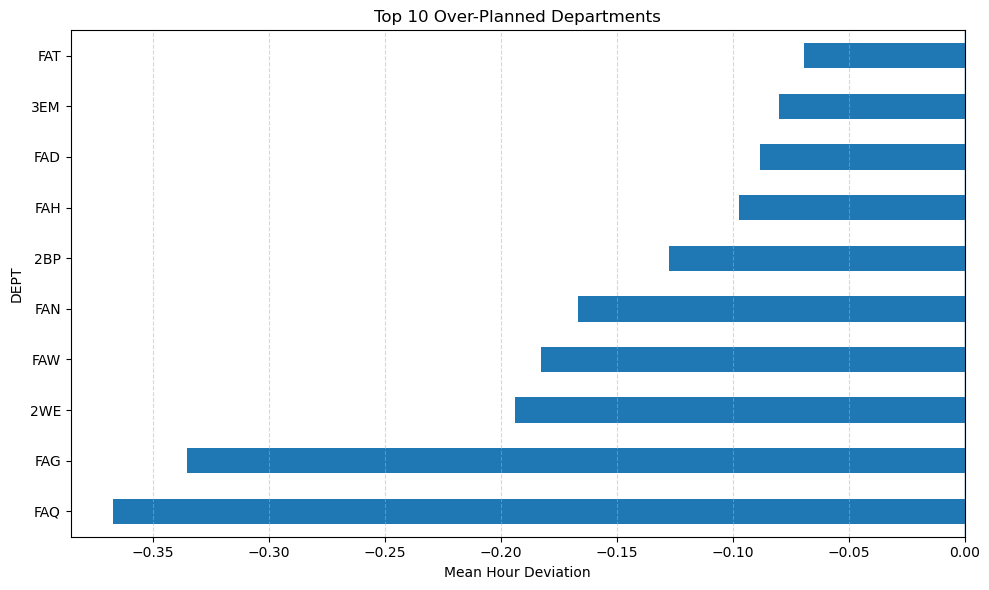

In [14]:
bias_by_dept = (pf.groupby('DEPT', observed=True)
    .agg(n=('PMNUM','nunique'),
         avg_planned=('AVG_PLANNED_HRS','mean'),
         avg_actual=('AVG_ACTUAL_HRS','mean'),
         avg_bias=('hour_deviation_pct','mean'))
    .sort_values('avg_bias', ascending=False))

print("\nPlanning Bias by Department:")
display(bias_by_dept)

top_over = bias_by_dept.nsmallest(10, 'avg_bias')['avg_bias']
top_under  = bias_by_dept.nlargest(10, 'avg_bias')['avg_bias']

plt.figure(figsize=(10, 6))
top_under.plot(kind='barh')
plt.title('Top 10 Under-Planned Departments')
plt.xlabel('Mean Hour Deviation')
plt.axvline(0, linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_over.plot(kind='barh')
plt.title('Top 10 Over-Planned Departments')
plt.xlabel('Mean Hour Deviation')
plt.axvline(0, linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### Takeaways
* There is a wide distribution of planning bias by Department.
* Tends to be more extreme in the underplanned than the overplanned
    *  The underplanned average bias is bigger at the extreme than the overplanned 

##### 3.2.4 Bias by PM Scope 


Planning Bias by PM Scope:


,n,avg_planned,avg_actual,avg_bias
PMSCOPETYPE,,,,
ROUTE,142,6.324772,8.520912,0.872606
LOCATION,861,4.509244,3.200593,0.099490
ASSET,17346,1.460311,1.344485,-0.032238


<Figure size 1000x500 with 0 Axes>

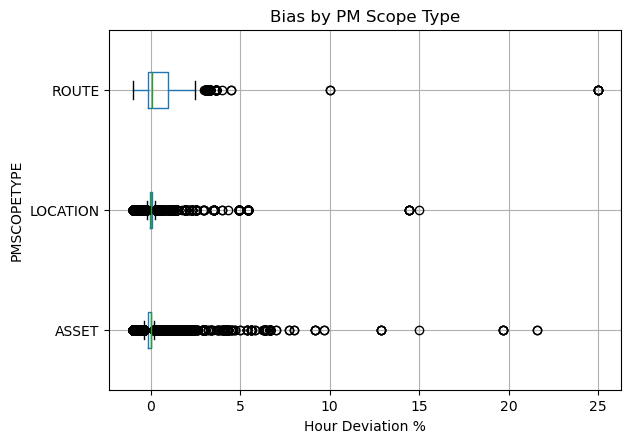

In [15]:
bias_by_scope = (pf.groupby('PMSCOPETYPE', observed=True)
    .agg(n=('PMNUM','nunique'),
         avg_planned=('AVG_PLANNED_HRS','mean'),
         avg_actual=('AVG_ACTUAL_HRS','mean'),
         avg_bias=('hour_deviation_pct','mean'))
    .sort_values('avg_bias', ascending=False))

print("\nPlanning Bias by PM Scope:")
display(bias_by_scope)

plt.figure(figsize=(10,5))
pf.boxplot(column='hour_deviation_pct', by='PMSCOPETYPE', vert=False)
plt.title('Bias by PM Scope Type')
plt.suptitle('')
plt.xlabel('Hour Deviation %')
plt.show()


### Takeaways
* Asset scope is slightly overplaned (3.2%)
* Location scope is slightly underplanned (9.9%)
* Route scope is very underplanned (87%)

##### 3.2.5 Bias by Plant 


Planning Bias by Plant:


,n,avg_planned,avg_actual,avg_bias
PLANT,,,,
1,7084,1.788438,1.781837,0.089055
3,2550,2.717268,2.017988,0.078652
F,1689,2.205132,1.780604,-0.059787
2,7026,1.417379,1.316912,-0.088044


<Figure size 1000x500 with 0 Axes>

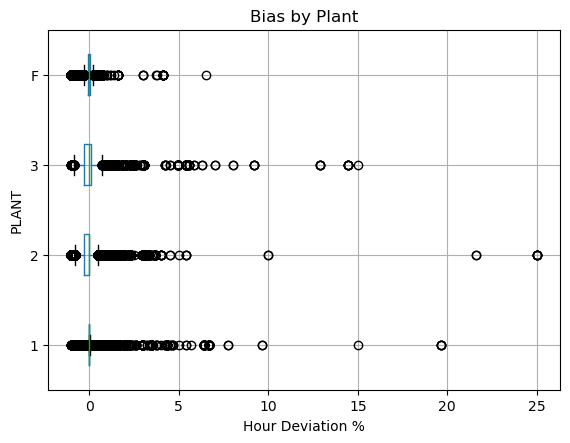

In [16]:
bias_by_plant = (pf.groupby('PLANT', observed=True)
    .agg(n=('PMNUM','nunique'),
         avg_planned=('AVG_PLANNED_HRS','mean'),
         avg_actual=('AVG_ACTUAL_HRS','mean'),
         avg_bias=('hour_deviation_pct','mean'))
    .sort_values('avg_bias', ascending=False))

print("\nPlanning Bias by Plant:")
display(bias_by_plant)

plt.figure(figsize=(10,5))
pf.boxplot(column='hour_deviation_pct', by='PLANT', vert=False)
plt.title('Bias by Plant')
plt.suptitle('')
plt.xlabel('Hour Deviation %')
plt.show()


### Takeaways 
* Plants 2 and F are slightly overplanned (-8.8% and -5.9%)
* Plants 1 and 3 are slightly underplanned  (8.9% and 7.8%)

##### 3.2.6 Bias by Line


Planning Bias by line:


,n,avg_planned,avg_actual,avg_bias
LINE,,,,
H,72,3.113233,4.291707,0.622105
L,124,1.668248,1.888521,0.580299
B,133,0.984586,1.272752,0.420104
D,93,0.573008,0.616897,0.127948
O,109,0.988466,1.063134,0.099015
1,7690,1.774473,1.736822,0.069319
3,1750,1.482509,1.148922,0.057447
S,11,1.414634,1.332552,-0.039400
0,131,3.200800,2.561430,-0.041380


(19, 4)

<Figure size 1000x500 with 0 Axes>

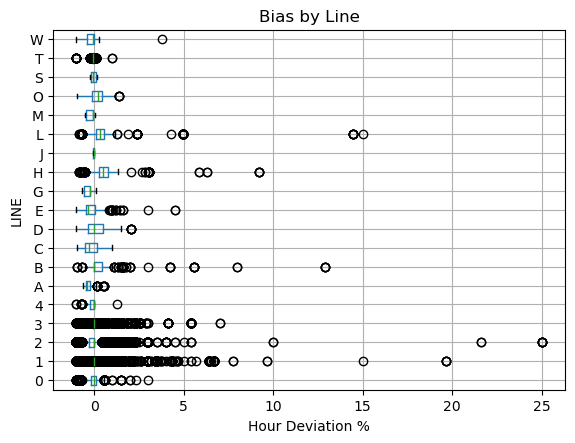

In [17]:
bias_by_line = (pf.groupby('LINE', observed=True)
    .agg(n=('PMNUM','nunique'),
         avg_planned=('AVG_PLANNED_HRS','mean'),
         avg_actual=('AVG_ACTUAL_HRS','mean'),
         avg_bias=('hour_deviation_pct','mean'))
    .sort_values('avg_bias', ascending=False))

print("\nPlanning Bias by line:")
display(bias_by_line)
display(bias_by_line.shape)

plt.figure(figsize=(10,5))
pf.boxplot(column='hour_deviation_pct', by='LINE', vert=False)
plt.title('Bias by Line')
plt.suptitle('')
plt.xlabel('Hour Deviation %')
plt.show()


### Takeaways 
* Most lines are overplanned, 12 of the 19 lines
* Leaving 7 lines underplanned
* With the most concerning underplanned lines being
    * H with 62% 
    * L with 58%
    * B with 42% 

##### 3.2.7 Bias by Zone


Planning Bias by Zone:


,n,avg_planned,avg_actual,avg_bias
ZONENAME,,,,
Waste Sand,2,0.758333,1.950000,8.857143
HP Scrap Handling,2,3.506944,15.926389,4.744271
Plastics Line 1 Injection,81,1.683851,3.611551,1.920402
MESD Department,1,0.428571,1.185714,1.766667
Die Maintenance,225,4.967857,13.044643,1.648214
...,...,...,...,...
HMA Machining Crankshaft Line,1,NaN,NaN,NaN
PAINT 1,5,NaN,NaN,NaN
Paint On,1,NaN,NaN,NaN


(180, 4)

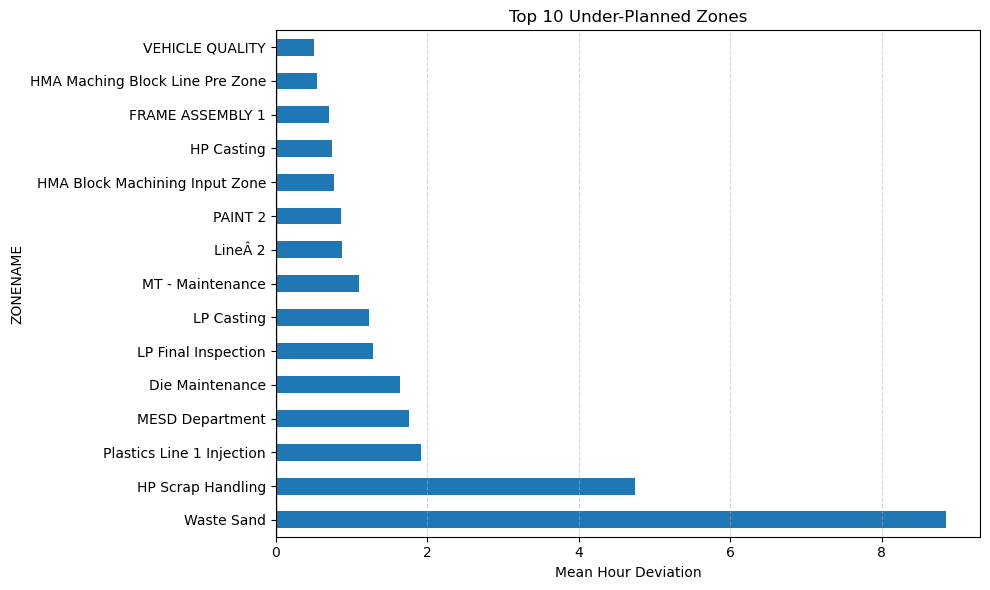

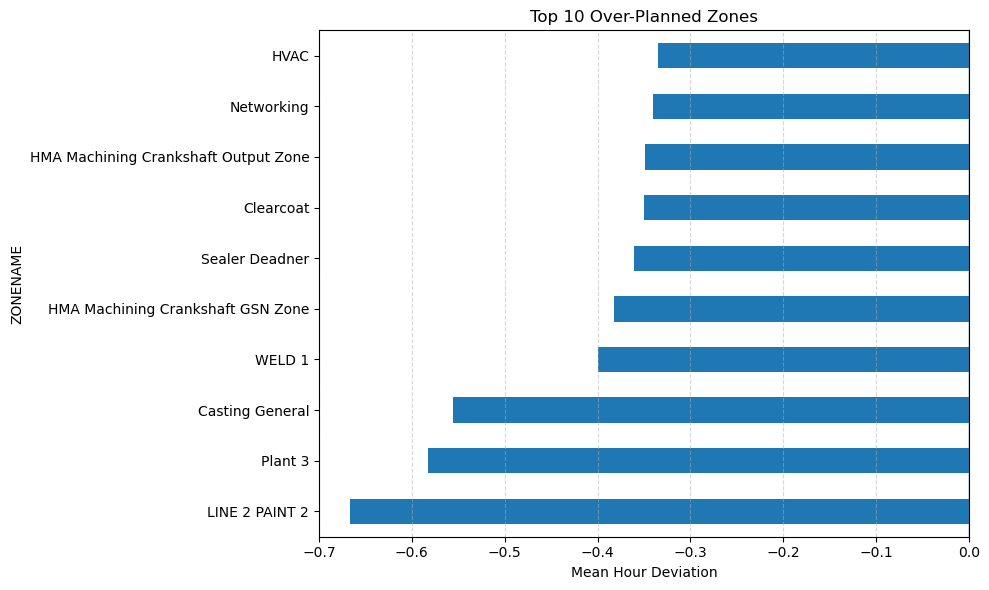

In [18]:
bias_by_zone = (pf.groupby('ZONENAME', observed=True)
    .agg(n=('PMNUM','nunique'),
         avg_planned=('AVG_PLANNED_HRS','mean'),
         avg_actual=('AVG_ACTUAL_HRS','mean'),
         avg_bias=('hour_deviation_pct','mean'))
    .sort_values('avg_bias', ascending=False))

print("\nPlanning Bias by Zone:")
display(bias_by_zone)
display(bias_by_zone.shape)

top_over_zone = bias_by_zone.nsmallest(10, 'avg_bias')['avg_bias']
top_under_zone = bias_by_zone.nlargest(15, 'avg_bias')['avg_bias']

plt.figure(figsize=(10, 6))
top_under_zone.plot(kind='barh')
plt.title('Top 10 Under-Planned Zones')
plt.xlabel('Mean Hour Deviation')
plt.axvline(0, linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_over_zone.plot(kind='barh')
plt.title('Top 10 Over-Planned Zones')
plt.xlabel('Mean Hour Deviation')
plt.axvline(0, linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Takeaways
* There is a wide distribution of planning bias by Department.
* Tends to be more extreme in the underplanned than the overplanned
    *  The underplanned average bias is bigger at the extreme than the overplanned 

##### 3.3 Accuracy by Category


=== Accuracy by INTERVAL (positive = under-planned, negative = over-planned) ===


,INTERVAL,n_pm,avg_planned_hrs,avg_actual_hrs,mean_dev_pct,median_dev_pct,mean_abs_dev_pct
34,17-MONTHS,4,1.250000,7.000000,4.600000,5.400000,4.600000
35,18-MONTHS,65,12.333333,37.833333,1.510417,2.031250,1.843750
39,3-YEARS,248,0.833333,1.833333,1.000000,1.500000,1.000000
37,26-MONTHS,2,1.666667,3.000000,0.800000,0.800000,0.800000
3,7-DAYS,33,5.004431,6.977709,0.762900,0.094082,0.903323
6,21-DAYS,4,0.166667,0.254630,0.527778,0.555556,0.527778
30,11-MONTHS,3,0.888889,1.361111,0.524242,0.300000,0.524242
32,52-WEEKS,3,0.666667,0.833333,0.500000,1.000000,0.833333
22,4-MONTHS,651,1.776459,1.841166,0.333829,0.000000,0.410560
29,10-MONTHS,1,0.750000,1.000000,0.333333,0.333333,0.333333



=== Accuracy by JOB_TYPE (positive = under-planned, negative = over-planned) ===


,JOB_TYPE,n_pm,avg_planned_hrs,avg_actual_hrs,mean_dev_pct,median_dev_pct,mean_abs_dev_pct
0,ADJUSTMENT,2400,1.441607,1.443844,0.102788,0.000000,0.240396
3,PREDICTIVE,2180,1.755841,1.579739,0.016104,0.000000,0.196713
1,INSPECTION,13672,1.694593,1.551192,-0.009794,0.000000,0.230515
2,NONASSET,121,12.468711,8.962084,-0.051034,-0.005882,0.160559
4,REPAIR,293,0.964423,0.811572,-0.114347,0.000000,0.165470



=== Accuracy by LABOR_CRAFT (positive = under-planned, negative = over-planned) ===


,LABOR_CRAFT,n_pm,avg_planned_hrs,avg_actual_hrs,mean_dev_pct,median_dev_pct,mean_abs_dev_pct
16,PLTSME,1,0.428571,1.185714,1.766667,1.766667,1.766667
2,DIESERV,225,5.055970,13.513060,1.728234,1.666667,1.767600
8,ESDIE,23,3.000000,8.120000,1.706667,2.000000,1.706667
22,QUALA,6,2.402381,4.571429,0.500487,0.991701,1.357629
6,EGMULT,9,0.460784,0.642565,0.260714,0.236111,0.260714
4,EGIND,1,0.500000,0.594444,0.188889,0.188889,0.188889
9,ESMAN,29,1.000000,1.162791,0.162791,0.115385,0.162791
5,EGMECH,156,4.421317,4.273219,0.156407,0.000000,0.398895
1,CONTMECH,71,1.814534,1.858024,0.113936,0.000000,0.131531
15,MAINT,2,0.611111,0.661111,0.066667,0.100000,0.066667



=== Accuracy by PMSCOPETYPE (positive = under-planned, negative = over-planned) ===


,PMSCOPETYPE,n_pm,avg_planned_hrs,avg_actual_hrs,mean_dev_pct,median_dev_pct,mean_abs_dev_pct
2,ROUTE,142,6.324772,8.520912,0.872606,0.094082,1.033458
1,LOCATION,861,4.509244,3.200593,0.099490,0.000000,0.280649
0,ASSET,17346,1.460311,1.344485,-0.032238,0.000000,0.202751



=== Accuracy by PLANT (positive = under-planned, negative = over-planned) ===


,PLANT,n_pm,avg_planned_hrs,avg_actual_hrs,mean_dev_pct,median_dev_pct,mean_abs_dev_pct
0,1,7084,1.788438,1.781837,0.089055,0.000000,0.159950
2,3,2550,2.717268,2.017988,0.078652,0.000000,0.368168
3,F,1689,2.205132,1.780604,-0.059787,-0.003846,0.150365
1,2,7026,1.417379,1.316912,-0.088044,0.000000,0.249590



=== Accuracy by LINE (positive = under-planned, negative = over-planned) ===


,LINE,n_pm,avg_planned_hrs,avg_actual_hrs,mean_dev_pct,median_dev_pct,mean_abs_dev_pct
11,H,72,3.113233,4.291707,0.622105,0.468750,0.726993
13,L,124,1.668248,1.888521,0.580299,0.299020,0.675507
6,B,133,0.984586,1.272752,0.420104,0.006944,0.479351
8,D,93,0.573008,0.616897,0.127948,0.000000,0.523624
15,O,109,0.988466,1.063134,0.099015,0.201306,0.497392
1,1,7690,1.774473,1.736822,0.069319,0.000000,0.152004
3,3,1750,1.482509,1.148922,0.057447,0.000000,0.250370
16,S,11,1.414634,1.332552,-0.039400,-0.055556,0.106942
0,0,131,3.200800,2.561430,-0.041380,0.000000,0.203099
12,J,3,2.500000,2.388889,-0.044444,-0.033333,0.044444



=== Accuracy by ZONENAME (positive = under-planned, negative = over-planned) ===


,ZONENAME,n_pm,avg_planned_hrs,avg_actual_hrs,mean_dev_pct,median_dev_pct,mean_abs_dev_pct
171,Waste Sand,2,0.758333,1.950000,8.857143,14.428571,8.857143
93,HP Scrap Handling,2,3.506944,15.926389,4.744271,4.744271,4.744271
141,Plastics Line 1 Injection,81,1.683851,3.611551,1.920402,0.000000,1.925015
117,MESD Department,1,0.428571,1.185714,1.766667,1.766667,1.766667
41,Die Maintenance,225,4.967857,13.044643,1.648214,1.645833,1.685893
106,LP Final Inspection,8,2.166667,2.993056,1.282986,2.145833,1.310764
104,LP Casting,27,3.078449,3.300846,1.238647,0.074194,1.469789
118,MT - Maintenance,2,4.083333,4.040705,1.096234,1.096234,1.153766
114,LineÂ 2,5,1.608696,2.990580,0.875725,1.166667,1.167754
126,PAINT 2,39,7.560662,9.749055,0.859328,0.094082,1.044959



=== Most inaccurate groups for INTERVAL ===


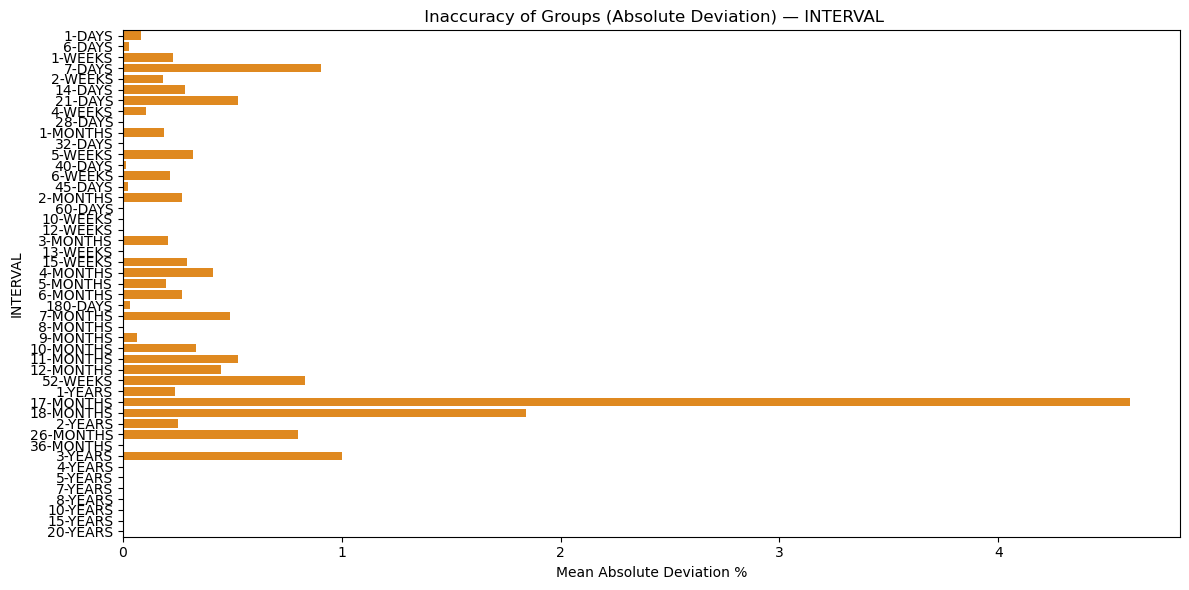


=== Most inaccurate groups for JOB_TYPE ===


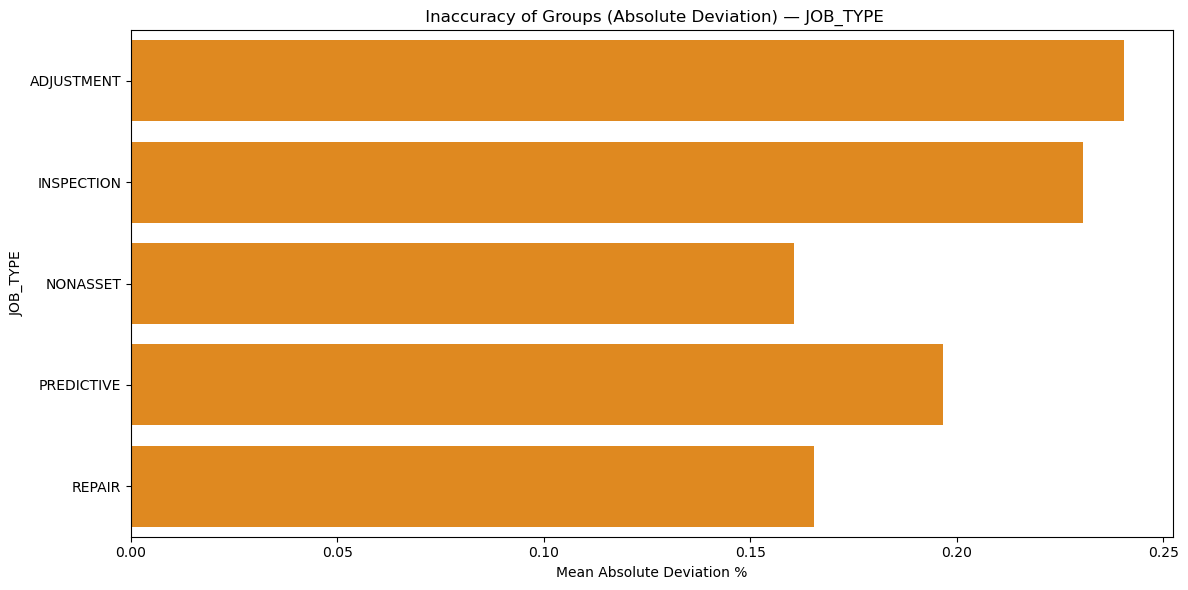


=== Most inaccurate groups for LABOR_CRAFT ===


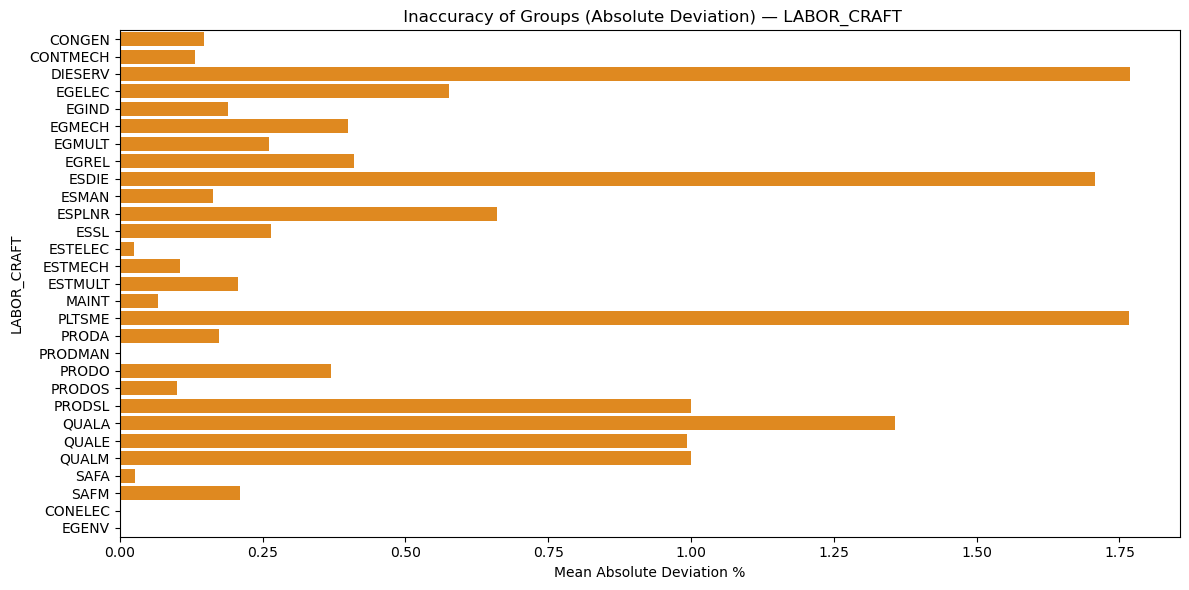


=== Most inaccurate groups for PMSCOPETYPE ===


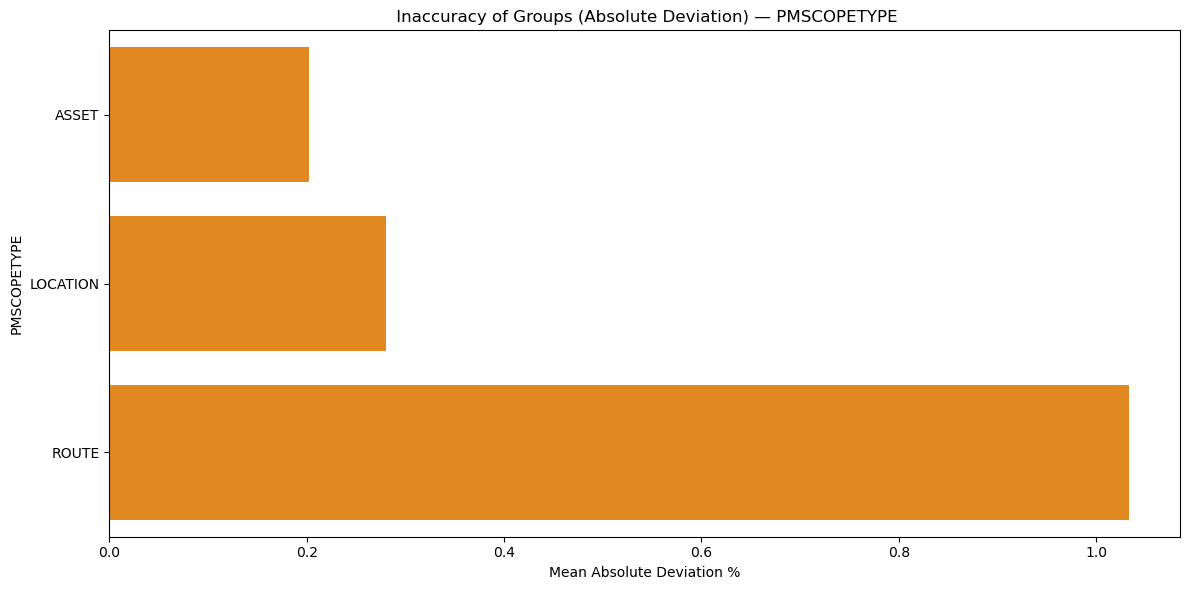


=== Most inaccurate groups for PLANT ===


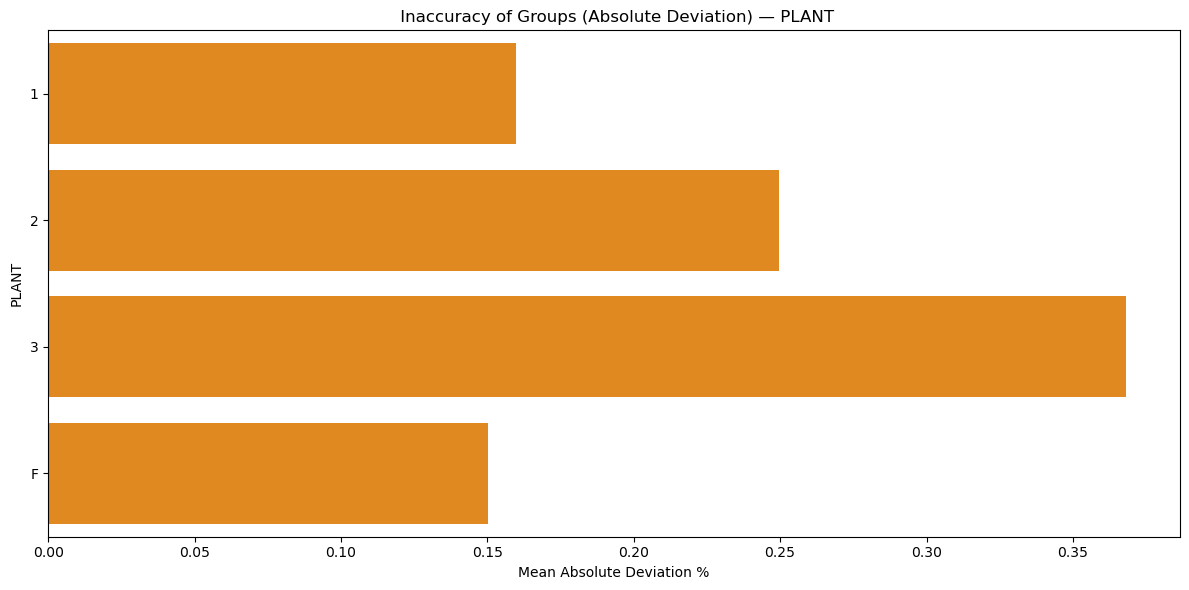


=== Most inaccurate groups for LINE ===


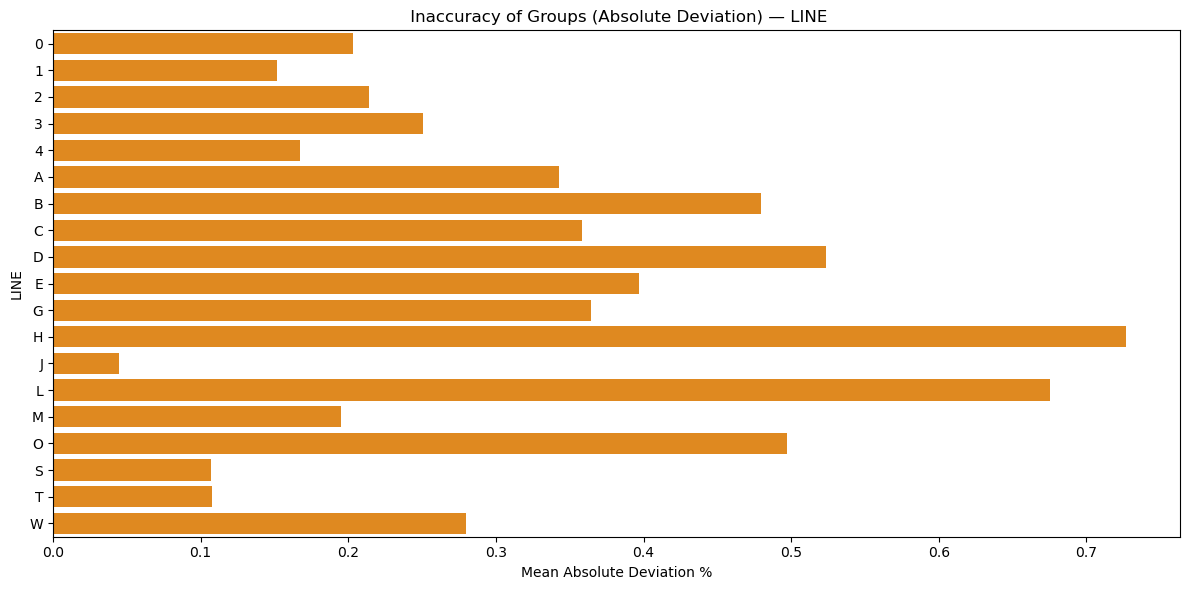


=== Most inaccurate groups for ZONENAME ===


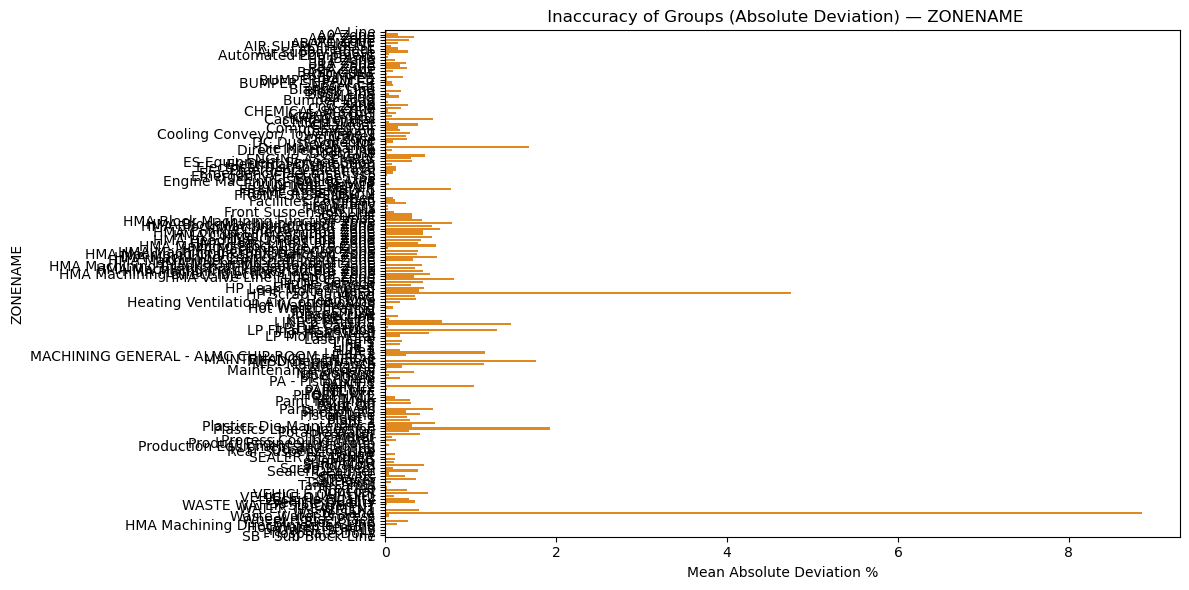

In [19]:
# Accuracy by Category
# Identify which groups deviate most from planned labor estimates
group_cols = ['INTERVAL', 'JOB_TYPE', 'LABOR_CRAFT', 'PMSCOPETYPE', 'PLANT', 'LINE', 'ZONENAME']

accuracy_summaries = {}

for col in group_cols:
    if col not in pf.columns:
        print(f"warning: '{col}' not in dataframe, skipping")
        continue
    
    summary = (pf.groupby(col, observed=True)
        .agg(n_pm=('PMNUM', 'nunique'),
             avg_planned_hrs=('AVG_PLANNED_HRS', 'mean'),
             avg_actual_hrs=('AVG_ACTUAL_HRS', 'mean'),
             mean_dev_pct=('hour_deviation_pct', 'mean'),
             median_dev_pct=('hour_deviation_pct', 'median'),
             mean_abs_dev_pct=('hour_deviation_pct', lambda s: s.abs().mean()))
        .reset_index()
        .sort_values('mean_dev_pct', ascending=False))
    
    accuracy_summaries[col] = summary
    
    print(f'\n=== Accuracy by {col} (positive = under-planned, negative = over-planned) ===')
    display(summary.head(15))

# Top Most inaccurate Groups 
def plot_most_inaccurate(summary, group_col, top_n=10):
    ranked = summary.sort_values('mean_abs_dev_pct', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=ranked,
        x='mean_abs_dev_pct',
        y=group_col,
        color='darkorange',   # solid color removes warning
        legend=False
    )
    plt.title(f" Inaccuracy of Groups (Absolute Deviation) — {group_col}")
    plt.xlabel("Mean Absolute Deviation %")
    plt.ylabel(group_col)
    plt.tight_layout()
    plt.show()

for col in accuracy_summaries:
    print(f"\n=== Most inaccurate groups for {col} ===")
    plot_most_inaccurate(accuracy_summaries[col], col)



### Takeaways
* Absolute deviation measures *how inaccurate* a planning estimate is,
regardless of whether the planner overestimated or underestimated.
* It is calculated as the absolute value of the deviation percentage:
    * High absolute deviation = inconsistent, unpredictable work.
    * Low absolute deviation = stable, well-estimated work.
* Job Type is pretty accurate
* Most Intervals and Labor Craft levels seem accurate
    * With a few levels of high inaccuracy
    * Probably due to the missingness issues discovered in data cleaning
* PM Scope Type has two somewhat accurate levels and one inaccurate level
* Plants are somewhat accurate across all levels
* Lines varied for accuracy
* Zones had a few majorly inaccurate levels, with the rest having varible accuracy

## Overall Takeaway 
This analysis shows that the required labor is consistently underestimated, meaning planned labor hours are often less than the actual hours. The severity of the hours mismatch varies based on the category levels explored. Several categories show systemic planning bias, particularly for high-frequency PMs and labor-intensive job types. While most PMs cluster within a reasonable deviation.


### Step 4 Answering Question 2
### Q2 — Where Are Our Planning Blind Spots?  
Blind spots = low completion, low on-time, or inconsistent behavior.  
Some groups of PMs consistently perform worse due to operational variability, complexity, or inconsistent execution discipline.
### Key Analyses
- **High vs Low Completion Comparison**  
  Compare hour deviations, complexity, and task density between the highest and lowest performing PMs.
- **Cross-Tabulation Analyses**  
  Examine completion and on-time performance across:
  - Department (DEPT)
  - Job Type (JOB_TYPE)
  - Labor Craft (LABOR_CRAFT)
### Goal
Identify organizational or process-related blind spots where planned activities frequently fail to meet expectations. These insights are essential for targeted operational improvements.


##### 4.1 Compare High vs Low Completion Metrics 

HIGH Completion Count:


(94445, 39)


LOW Completion Count:


(788, 39)


MEDIUM Completion Count:


(0, 39)

HIGH Completion Summary:


,hour_deviation_pct,task_density,complexity_score
count,93896.000000,85978.000000,85978.000000
mean,0.000234,31.779410,0.149589
std,0.605809,154.107257,0.053959
min,-1.000000,0.048000,0.005694
25%,-0.104167,5.200000,0.112290
50%,0.000000,10.000000,0.140664
75%,0.000000,20.000000,0.188713
max,25.000000,7380.000000,0.415578



LOW Completion Summary:


,hour_deviation_pct,task_density,complexity_score
count,730.000000,699.000000,699.000000
mean,-0.473896,6.079533,0.124580
std,0.546459,5.558399,0.068018
min,-1.000000,0.062500,0.002264
25%,-0.816761,2.562500,0.086257
50%,-0.500000,4.000000,0.112290
75%,-0.385714,8.571429,0.138941
max,3.000000,56.000000,0.469038


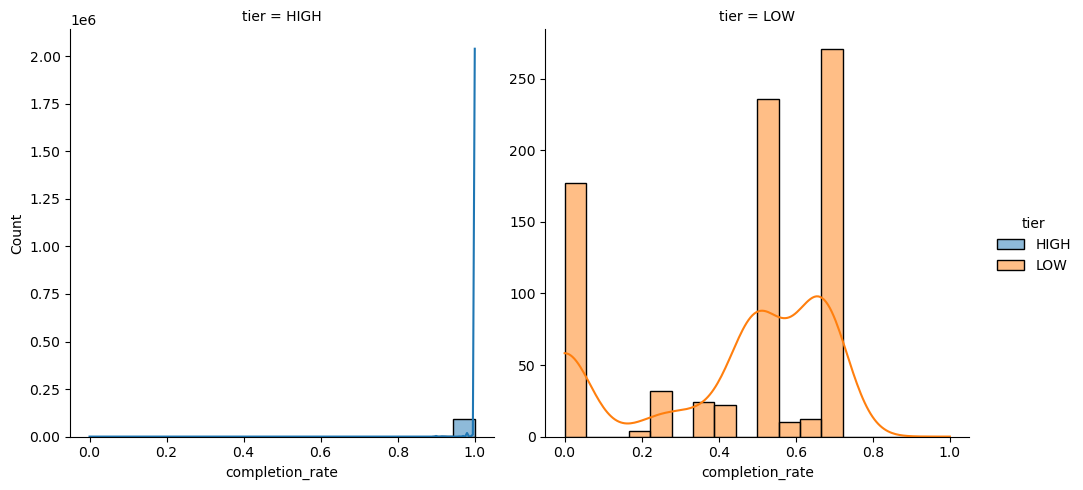

In [20]:
high = pf[pf['performance_tier'] == 'HIGH']
low = pf[pf['performance_tier'] == 'LOW']
medium = pf[pf['performance_tier'] == 'MEDUIM']

print("HIGH Completion Count:")
display(high.shape)

print("\nLOW Completion Count:")
display(low.shape)

print("\nMEDIUM Completion Count:")
display(medium.shape)

print("HIGH Completion Summary:")
display(high[['hour_deviation_pct','task_density','complexity_score']].describe())

print("\nLOW Completion Summary:")
display(low[['hour_deviation_pct','task_density','complexity_score']].describe())

df_temp = pf.copy()
df_temp['tier'] = pf['performance_tier']  # or completion_band if you renamed

sns.displot(
    data=df_temp[df_temp['tier'].isin(['HIGH','LOW'])],
    x='completion_rate',
    hue='tier',
    col='tier',
    kde=True,
    facet_kws={'sharey': False}
)


##### 4.2 Cross-tabulate by major Categories 

##### 4.2.1 By Department 


Completion by DEPT:


,count,avg_completion,avg_on_time
DEPT,,,
1ME,1,0.714286,0.571429
FAG,5,0.800000,0.742857
FAQ,11,0.850000,0.750000
FAW,33,0.915033,0.745098
3EM,788,0.952455,0.315923
FAT,52,0.955556,0.918519
FA0,1520,0.972803,0.932797
1PE,46,0.978022,0.724509
FAD,28,0.979609,0.953095


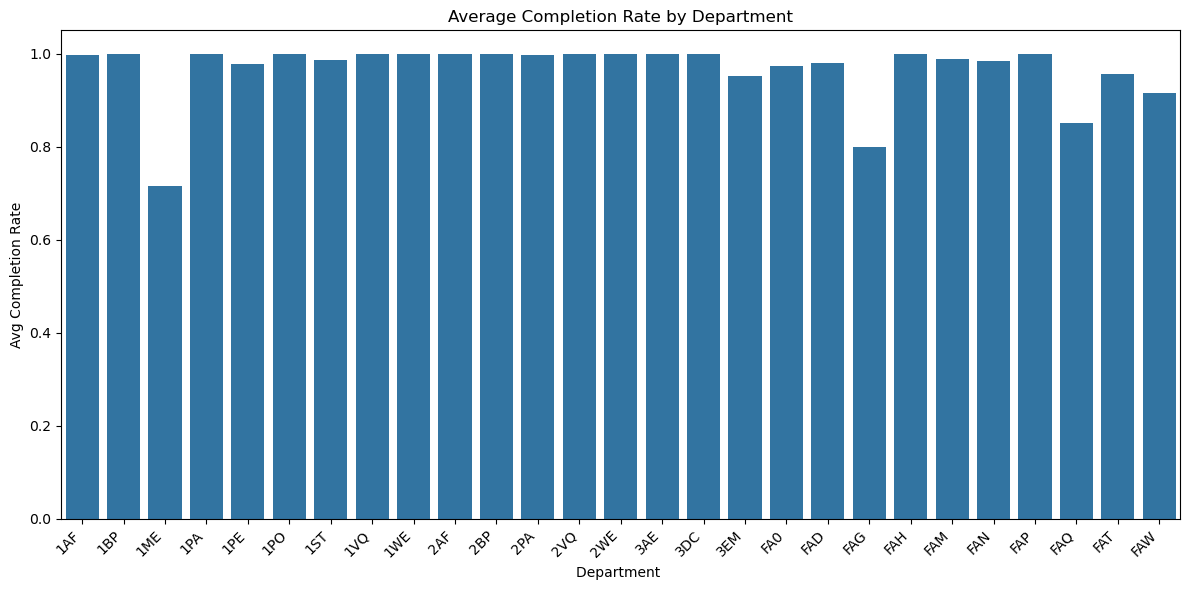

In [21]:
comp_by_dept = (pf.groupby('DEPT', observed=True)
    .agg(count=('PMNUM','nunique'),
         avg_completion=('completion_rate','mean'),
         avg_on_time=('on_time_rate','mean'))
    .sort_values('avg_completion'))

print("\nCompletion by DEPT:")
display(comp_by_dept)

df_plot = comp_by_dept.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    x='DEPT',
    y='avg_completion'
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Completion Rate by Department")
plt.xlabel("Department ")
plt.ylabel("Avg Completion Rate")
plt.tight_layout()
plt.show()

##### 4.2.2 By Job Type


Completion by JOB_TYPE:


,count,avg_completion,avg_on_time
JOB_TYPE,,,
INSPECTION,13672,0.991196,0.897776
PREDICTIVE,2180,0.992375,0.923362
ADJUSTMENT,2400,0.993504,0.945720
NONASSET,121,0.994122,0.882096
REPAIR,293,0.999404,0.940944


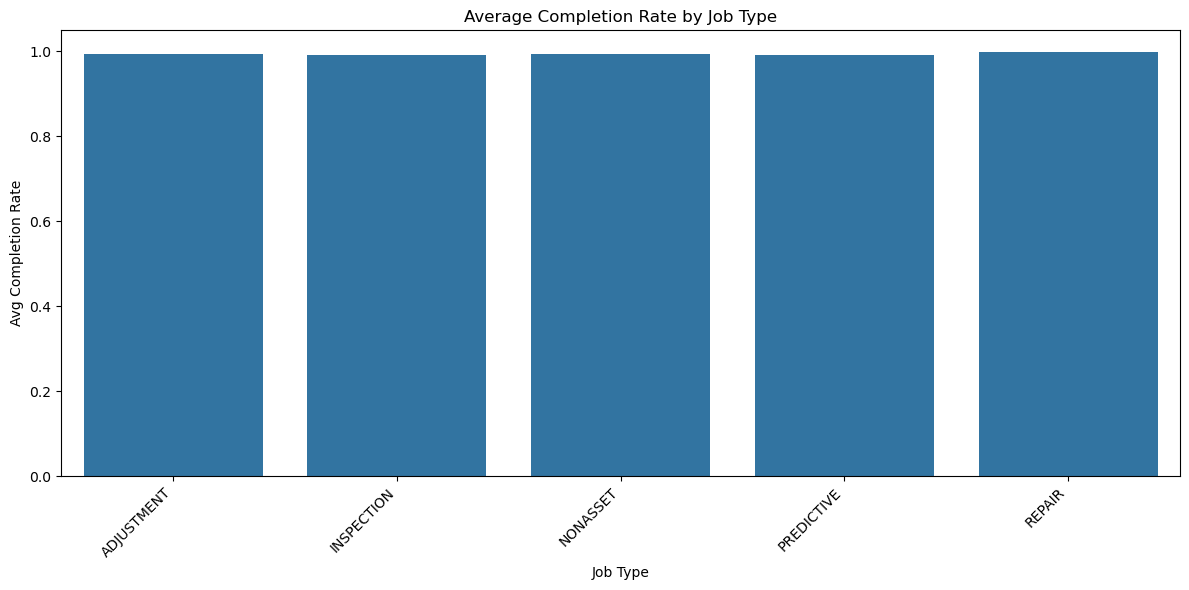

In [22]:
comp_by_jobtype = (pf.groupby('JOB_TYPE', observed=True)
    .agg(count=('PMNUM','nunique'),
         avg_completion=('completion_rate','mean'),
         avg_on_time=('on_time_rate','mean'))
    .sort_values('avg_completion'))

print("\nCompletion by JOB_TYPE:")
display(comp_by_jobtype)

df_plot = comp_by_jobtype.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    x='JOB_TYPE',
    y='avg_completion'
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Completion Rate by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Avg Completion Rate")
plt.tight_layout()
plt.show()

##### 4.2.3 By Labor Craft


Completion by LABOR_CRAFT:


,count,avg_completion,avg_on_time
LABOR_CRAFT,,,
PLTSME,1,0.714286,0.571429
DIESERV,225,0.865672,0.865672
ESPLNR,10,0.920000,0.720000
ESDIE,23,0.920000,0.920000
CONGEN,2319,0.975500,0.935387
PRODA,1799,0.983857,0.865802
QUALM,133,0.992578,0.958091
PRODOS,36,0.994370,0.757136
PRODO,787,0.995686,0.870356


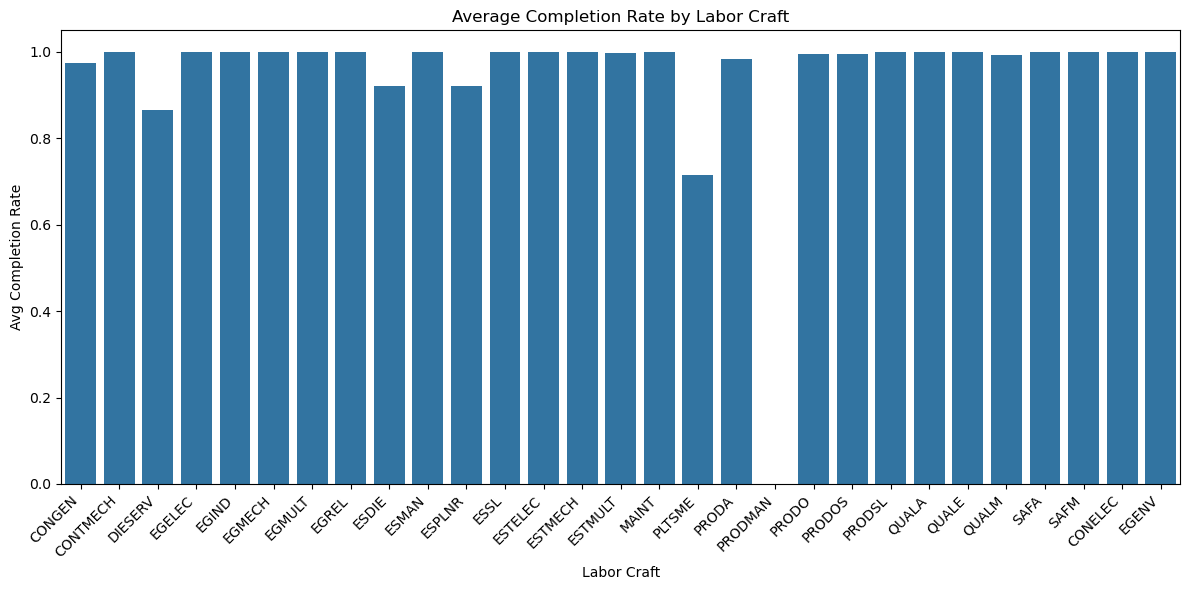

In [23]:
comp_by_craft = (pf.groupby('LABOR_CRAFT', observed=True)
    .agg(count=('PMNUM','nunique'),
         avg_completion=('completion_rate','mean'),
         avg_on_time=('on_time_rate','mean'))
    .sort_values('avg_completion'))

print("\nCompletion by LABOR_CRAFT:")
display(comp_by_craft)

df_plot = comp_by_craft.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    x='LABOR_CRAFT',
    y='avg_completion'
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Completion Rate by Labor Craft")
plt.xlabel("Labor Craft")
plt.ylabel("Avg Completion Rate")
plt.tight_layout()
plt.show()

##### 4.2.4 By Plant


Completion by Plant:


,count,avg_completion,avg_on_time
PLANT,,,
F,1689,0.971531,0.930400
3,2550,0.982838,0.685022
1,7084,0.998047,0.974304
2,7026,0.998720,0.919909


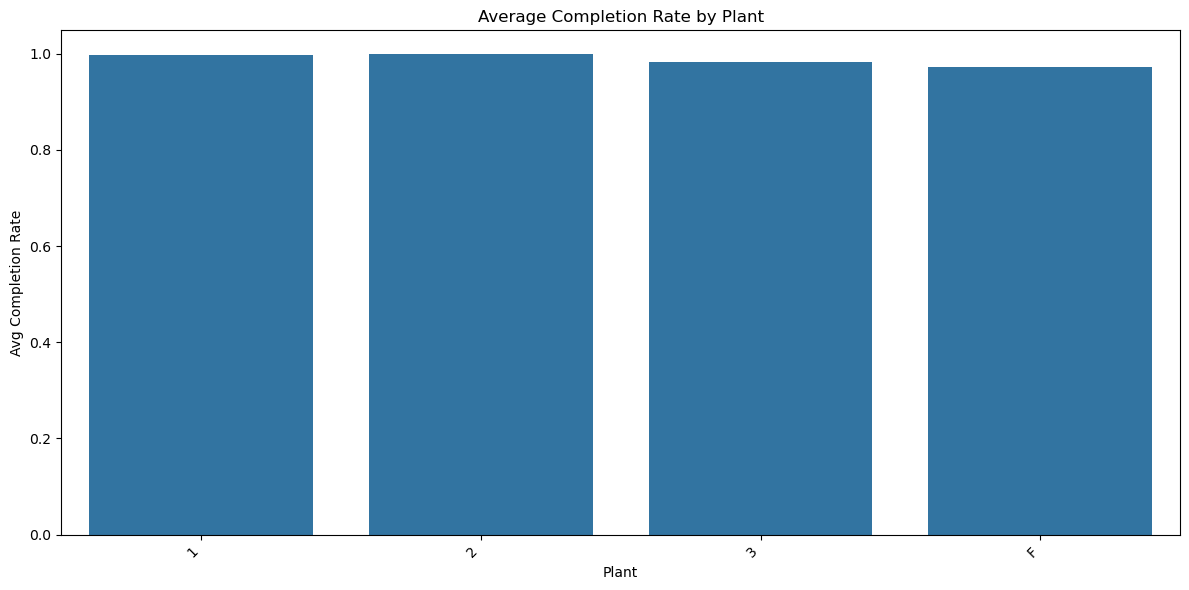

In [24]:
comp_by_plant = (pf.groupby('PLANT', observed=True)
    .agg(count=('PMNUM','nunique'),
         avg_completion=('completion_rate','mean'),
         avg_on_time=('on_time_rate','mean'))
    .sort_values('avg_completion'))

print("\nCompletion by Plant:")
display(comp_by_plant)

df_plot = comp_by_plant.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    x='PLANT',
    y='avg_completion'
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Completion Rate by Plant")
plt.xlabel("Plant")
plt.ylabel("Avg Completion Rate")
plt.tight_layout()
plt.show()


##### 4.2.5 By Line 


Completion by Line:


,count,avg_completion,avg_on_time
LINE,,,
A,35,0.840164,0.270492
E,203,0.887906,0.252540
D,93,0.905660,0.227044
W,33,0.915033,0.745098
4,58,0.963793,0.873563
C,276,0.972231,0.497300
0,131,0.977629,0.931393
T,46,0.981633,0.944883
M,9,0.983333,0.805714


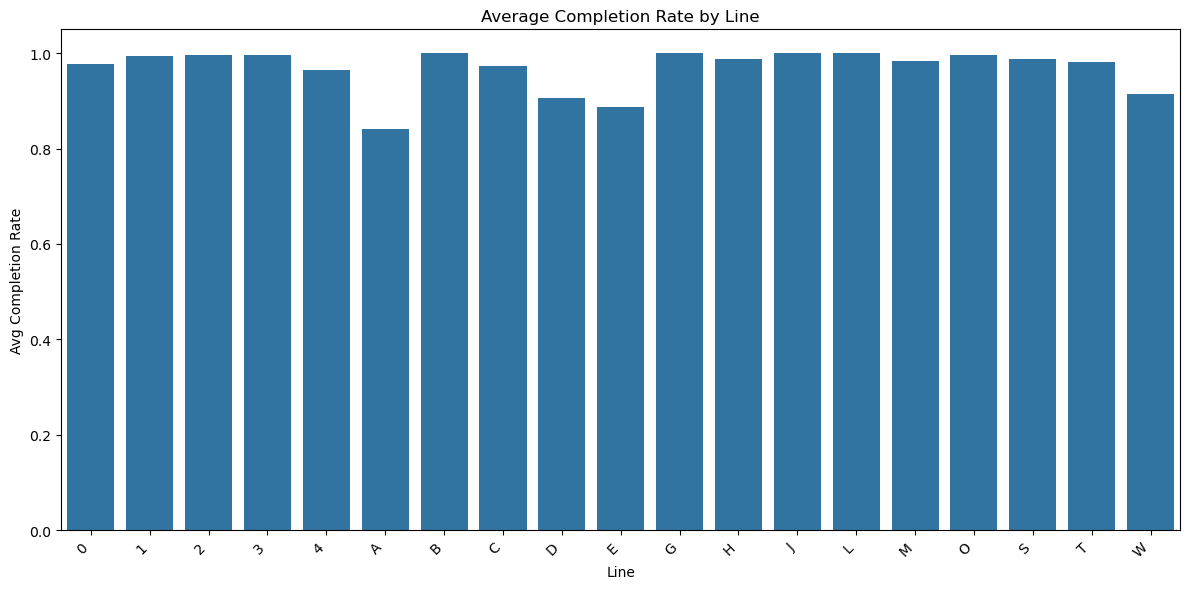

In [25]:
comp_by_line = (pf.groupby('LINE', observed=True)
    .agg(count=('PMNUM','nunique'),
         avg_completion=('completion_rate','mean'),
         avg_on_time=('on_time_rate','mean'))
    .sort_values('avg_completion'))

print("\nCompletion by Line:")
display(comp_by_line)

df_plot = comp_by_line.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    x='LINE',
    y='avg_completion'
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Completion Rate by Line")
plt.xlabel("Line")
plt.ylabel("Avg Completion Rate")
plt.tight_layout()
plt.show()

##### 4.2.6 By PM Scope


Completion by PM Scope:


,count,avg_completion,avg_on_time
PMSCOPETYPE,,,
ASSET,17346,0.991347,0.904729
ROUTE,142,0.995451,0.956876
LOCATION,861,0.999643,0.925365


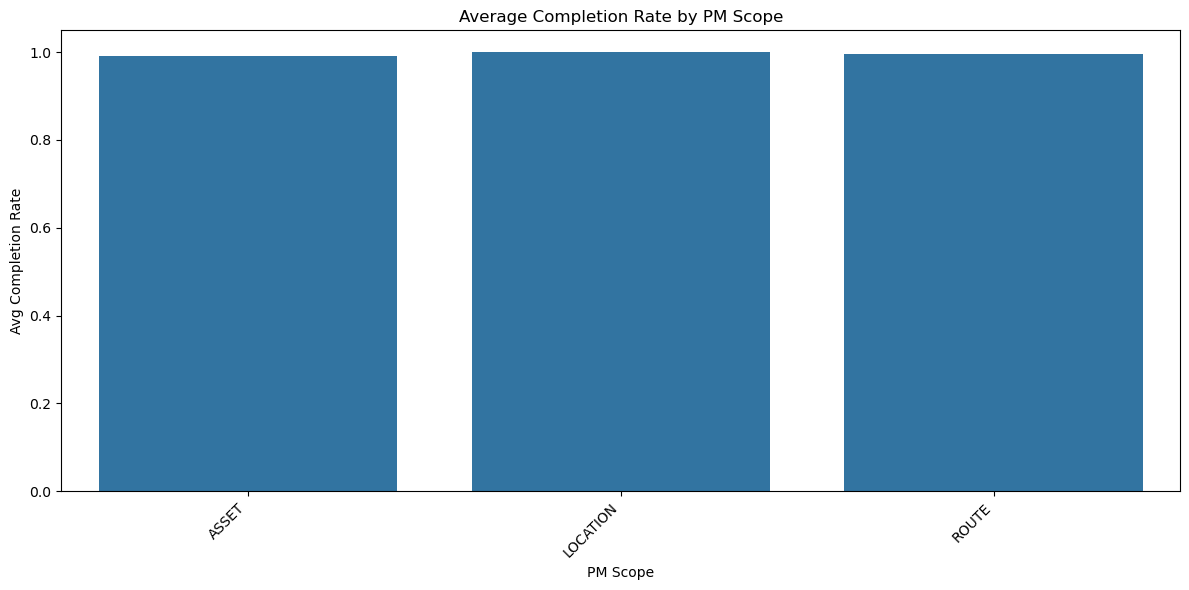

In [26]:
comp_by_scope = (pf.groupby('PMSCOPETYPE', observed=True)
    .agg(count=('PMNUM','nunique'),
         avg_completion=('completion_rate','mean'),
         avg_on_time=('on_time_rate','mean'))
    .sort_values('avg_completion'))

print("\nCompletion by PM Scope:")
display(comp_by_scope)

df_plot = comp_by_scope.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    x='PMSCOPETYPE',
    y='avg_completion'
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Completion Rate by PM Scope")
plt.xlabel("PM Scope")
plt.ylabel("Avg Completion Rate")
plt.tight_layout()
plt.show()

##### 4.2.7 By Zone


Completion by Zone:


,count,avg_completion,avg_on_time
ZONENAME,,,
LINE 2 PAINT 2,7,0.333333,0.333333
MESD Department,1,0.714286,0.571429
HMA Valve Line Function Zone,35,0.840164,0.270492
Die Maintenance,225,0.864286,0.864286
HMA Head Line 1 Function Zone,112,0.869458,0.280378
...,...,...,...
Engine Machining Tooling Area,1,NaN,NaN
HMA Machining Crankshaft Line,1,NaN,NaN
PAINT 1,5,NaN,NaN


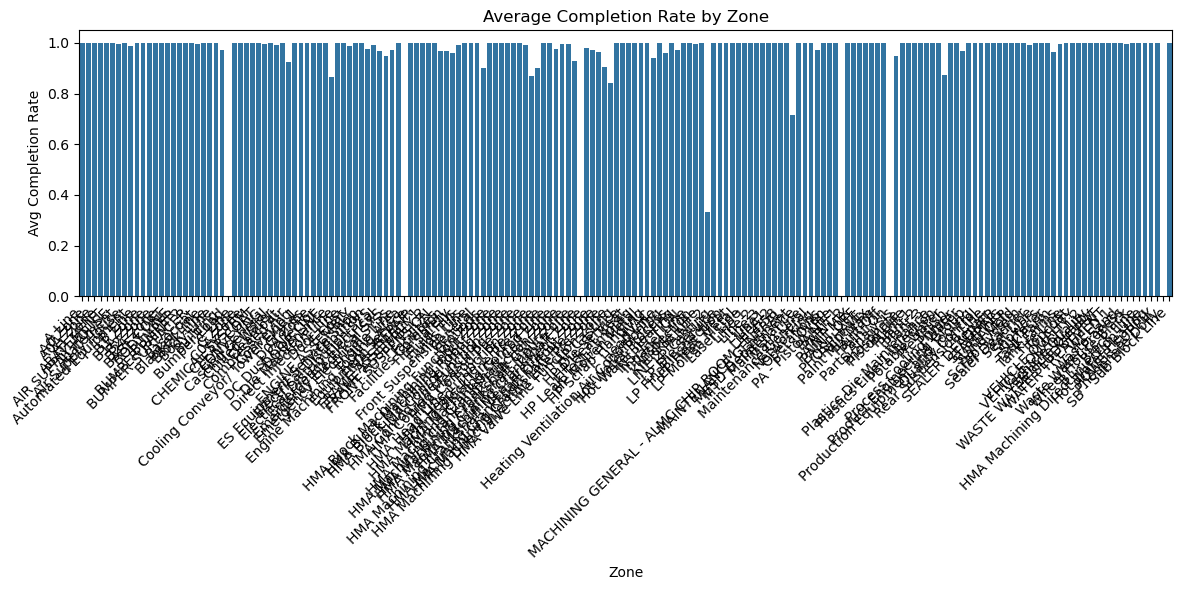

In [27]:
comp_by_zone = (pf.groupby('ZONENAME', observed=True)
    .agg(count=('PMNUM','nunique'),
         avg_completion=('completion_rate','mean'),
         avg_on_time=('on_time_rate','mean'))
    .sort_values('avg_completion'))

print("\nCompletion by Zone:")
display(comp_by_zone)

df_plot = comp_by_zone.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot,
    x='ZONENAME',
    y='avg_completion'
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Completion Rate by Zone")
plt.xlabel("Zone")
plt.ylabel("Avg Completion Rate")
plt.tight_layout()
plt.show()

##### 4.2 Summary

In [28]:
def filter_low_completion(df, threshold=0.75):
    return df[df['avg_completion'] < threshold]
    
low_dept = filter_low_completion(comp_by_dept)
print("Departments with Low Completion")
display(low_dept)

low_jobtype = filter_low_completion(comp_by_jobtype)
print("\nJob Type with Low Completion")
display(low_jobtype)

low_craft = filter_low_completion(comp_by_craft)
print("\nLabor Craft with Low Completion")
display(low_craft)

low_plant = filter_low_completion(comp_by_plant)
print("\nPlants with Low Completion")
display(low_plant)

low_line = filter_low_completion(comp_by_line)
print("\nLines with Low Completion")
display(low_line)

low_scope = filter_low_completion(comp_by_scope)
print("\nPM Scopes with Low Completion")
display(low_scope)

low_zone = filter_low_completion(comp_by_zone)
print("\nZones with Low Completion")
display(low_zone)

Departments with Low Completion


,count,avg_completion,avg_on_time
DEPT,,,
1ME,1,0.714286,0.571429



Job Type with Low Completion


,count,avg_completion,avg_on_time
JOB_TYPE,,,



Labor Craft with Low Completion


,count,avg_completion,avg_on_time
LABOR_CRAFT,,,
PLTSME,1,0.714286,0.571429



Plants with Low Completion


,count,avg_completion,avg_on_time
PLANT,,,



Lines with Low Completion


,count,avg_completion,avg_on_time
LINE,,,



PM Scopes with Low Completion


,count,avg_completion,avg_on_time
PMSCOPETYPE,,,



Zones with Low Completion


,count,avg_completion,avg_on_time
ZONENAME,,,
LINE 2 PAINT 2,7,0.333333,0.333333
MESD Department,1,0.714286,0.571429


## Overall Takeaway
The comparison of high- and low-performing PM groups reveals several structural blind spots in planning accuracy. Categories such as specific labor crafts and certain zones or departments consistently show lower completion and on-time performance. These blind spots could  point to outdated job plans, poor resource alignment, or PMs that are overly complex or insufficiently scoped. By isolating these weak areas, we can target the PM groups for improvements.

### Step 5 Answering Question 3
### Q3 — When and Why Do PMs Fail?  
In this section, we focus on identifying PMs with poor execution performance and understanding what drives their failure.
### Failure Definition
A PM is considered **failing** when its completion rate falls below 75%.
### Key Analyses
- **Identify High-Incompletion PMNUMs**  
  Highlight PMs with consistently poor completion or on-time performance.
- **Characteristic Comparison**  
  Compare complexity, planned hours, actual hours, and deviation between:
  - Failing PMs
  - Successful PMs  
- **Departmental Execution Discipline**  
  Examine which departments consistently show strong or weak execution patterns.
### Objective
Determine root causes behind failing PMs and uncover actionable insights to improve planning rigor and execution reliability.

##### 5.1 Indentifying PMNUMs that are failing 

In [29]:
fail_threshold = 0.75

failing = pf[pf['completion_rate'] < fail_threshold]
good = pf[pf['completion_rate'] >= fail_threshold]

print("Failing PMNUMs:", failing['PMNUM'].nunique())
print("Good PMNUMs:", good['PMNUM'].nunique())

failing_pm_list = (failing['PMNUM']
    .drop_duplicates()
    .sort_values()
    .tolist())



Failing PMNUMs: 306
Good PMNUMs: 18170


##### 5.2 Characteristics Comparison 

In [30]:
# worst pms Complexity and deviations
worst_pm = (failing.groupby('PMNUM')
    .agg(avg_completion=('completion_rate', 'mean'),
         avg_on_time=('on_time_rate', 'mean'),
         interval=('INTERVAL', 'first'),
         job_type=('JOB_TYPE', 'first'),
         dept=('DEPT', 'first'),
         process=('PROCESSNAME', 'first'),
         avg_task_count=('TASK_COUNT', 'mean'),
         avg_planned=('AVG_PLANNED_HRS', 'mean'),
         avg_actual=('AVG_ACTUAL_HRS', 'mean'),
         task_density=('task_density','mean'),
         complexity=('complexity_score', 'mean'))
    .sort_values('avg_completion'))

# add deviation columns
worst_pm['avg_deviation'] = worst_pm['avg_actual'] - worst_pm['avg_planned']
worst_pm['avg_dev_pct'] = worst_pm['avg_deviation'] / worst_pm['avg_planned']

print("\nWorst failing PMs (with complexity & deviation):")
display(worst_pm.head())

#    Failing PMs vs Successful PMs
# ----------------------------
pf_char = pf.copy()

# Deviation columns
pf_char['deviation'] = pf_char['AVG_ACTUAL_HRS'] - pf_char['AVG_PLANNED_HRS']
pf_char['dev_pct'] = (pf_char['deviation'] / pf_char['AVG_PLANNED_HRS'].replace(0, np.nan))

# Label groups explicitly
pf_char['group'] = np.where(pf_char['completion_rate'] < fail_threshold, 'Failing PMs', 'Successful PMs')

char_summary = (pf_char.groupby('group', observed=True)
    .agg(n_rows=('PMNUM', 'size'),
        n_pm=('PMNUM', 'nunique'),
        avg_task_count=('TASK_COUNT', 'mean'),
        median_task_count=('TASK_COUNT', 'median'),
        avg_planned=('AVG_PLANNED_HRS', 'mean'),
        avg_actual=('AVG_ACTUAL_HRS', 'mean'),
        avg_deviation=('deviation', 'mean'),
        avg_abs_deviation=('deviation', lambda s: s.abs().mean()),
        avg_dev_pct=('dev_pct', 'mean'),
        task_density=('task_density','mean'),
        complexity=('complexity_score', 'mean'))
    .round(3))

print("\nCharacteristic comparison: Failing PMs vs Successful PMs")
display(char_summary)


Worst failing PMs (with complexity & deviation):


,avg_completion,avg_on_time,interval,job_type,dept,process,avg_task_count,avg_planned,avg_actual,task_density,complexity,avg_deviation,avg_dev_pct
PMNUM,,,,,,,,,,,,,
PM104438,0.0,0.0,1-YEARS,ADJUSTMENT,FA0,NaN,11.0,0.5,0.0,22.000000,0.107711,-0.5,-1.0
PM104488,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,NaN,NaN,-4.0,-1.0
PM104491,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,NaN,NaN,-4.0,-1.0
PM104728,0.0,0.0,1-YEARS,ADJUSTMENT,FA0,NaN,26.0,3.5,0.0,7.428571,0.141299,-3.5,-1.0
PM104774,0.0,0.0,6-MONTHS,ADJUSTMENT,FA0,NaN,10.0,3.0,0.0,3.333333,0.151578,-3.0,-1.0



Characteristic comparison: Failing PMs vs Successful PMs


,n_rows,n_pm,avg_task_count,median_task_count,avg_planned,avg_actual,avg_deviation,avg_abs_deviation,avg_dev_pct,task_density,complexity
group,,,,,,,,,,,
Failing PMs,788,306,9.346,6.0,3.090,1.417,-1.644,2.441,-0.474,6.080,0.125
Successful PMs,101233,20081,13.242,8.0,1.824,1.630,-0.180,0.520,-0.003,30.856,0.148


##### 5.3 Departmental Execution

In [31]:
import numpy as np  # make sure this is imported

# --- PARAMETERS ---
fail_threshold = 0.75    # completion rate below this = failing
min_pm_per_dept = 10     # ignore tiny departments (change if needed)

df = pf.copy()

# Flag failing rows
df['is_failing'] = df['completion_rate'] < fail_threshold

# Department-level execution summary
dept_exec = (
    df.groupby('DEPT', observed=True)
      .agg(
          n_rows=('PMNUM', 'size'),
          n_pm=('PMNUM', 'nunique'),
          avg_completion=('completion_rate', 'mean'),
          median_completion=('completion_rate', 'median'),
          avg_ontime=('on_time_rate', 'mean'),
          failing_rows=('is_failing', 'sum'),
          complexity=('complexity_score', 'mean'),
          density=('task_density', 'mean'))
      .reset_index())

# % of failing records per department
dept_exec['pct_failing_rows'] = dept_exec['failing_rows'] / dept_exec['n_rows']

# Filter to departments with enough volume
dept_exec = dept_exec[dept_exec['n_pm'] >= min_pm_per_dept]

# Classify execution discipline tiers
def classify_execution(row):
    if (row['avg_completion'] >= 0.9) and (row['avg_ontime'] >= 0.9):
        return "Strong execution"
    elif (row['avg_completion'] < 0.8) or (row['avg_ontime'] < 0.8):
        return "Weak execution"
    else:
        return "Moderate execution"

dept_exec['execution_tier'] = dept_exec.apply(classify_execution, axis=1)

# Sort for review (weak at top)
dept_exec_sorted = dept_exec.sort_values(['execution_tier', 'avg_completion'])

print("Departmental Execution Discipline Summary:")
display(dept_exec_sorted)

# Optional: quickly see strongest and weakest groups
print("\nStrong execution departments:")
display(dept_exec_sorted[dept_exec_sorted['execution_tier'] == 'Strong execution'])

print("\nWeak execution departments:")
display(dept_exec_sorted[dept_exec_sorted['execution_tier'] == 'Weak execution'])


Departmental Execution Discipline Summary:


,DEPT,n_rows,n_pm,avg_completion,median_completion,avg_ontime,failing_rows,complexity,density,pct_failing_rows,execution_tier
10,2BP,1224,163,0.999084,1.000000,0.896615,0,0.130795,11.149139,0.000000,Moderate execution
13,2WE,17000,4334,0.999332,1.000000,0.898581,1,0.167071,18.193539,0.000059,Moderate execution
5,1PO,1947,101,1.000000,1.000000,0.896613,0,0.110931,11.973090,0.000000,Moderate execution
14,3AE,6852,1566,1.000000,1.000000,0.880480,0,0.119853,10.383349,0.000000,Moderate execution
20,FAH,54,17,1.000000,1.000000,0.870370,0,0.116242,7.521605,0.000000,Moderate execution
25,FAT,702,52,0.955556,0.980769,0.918519,20,0.156597,10.492735,0.028490,Strong execution
17,FA0,13092,1520,0.972803,1.000000,0.932797,334,0.139486,7.727886,0.025512,Strong execution
18,FAD,494,28,0.979609,0.991781,0.953095,6,0.146527,4.793860,0.012146,Strong execution
6,1ST,3044,566,0.986253,1.000000,0.945863,72,0.186273,15.041863,0.023653,Strong execution
21,FAM,82,11,0.987805,1.000000,0.987805,0,0.120853,6.963415,0.000000,Strong execution



Strong execution departments:


,DEPT,n_rows,n_pm,avg_completion,median_completion,avg_ontime,failing_rows,complexity,density,pct_failing_rows,execution_tier
25,FAT,702,52,0.955556,0.980769,0.918519,20,0.156597,10.492735,0.028490,Strong execution
17,FA0,13092,1520,0.972803,1.000000,0.932797,334,0.139486,7.727886,0.025512,Strong execution
18,FAD,494,28,0.979609,0.991781,0.953095,6,0.146527,4.793860,0.012146,Strong execution
6,1ST,3044,566,0.986253,1.000000,0.945863,72,0.186273,15.041863,0.023653,Strong execution
21,FAM,82,11,0.987805,1.000000,0.987805,0,0.120853,6.963415,0.000000,Strong execution
0,1AF,4960,744,0.997625,1.000000,0.990482,0,0.128974,22.246890,0.000000,Strong execution
11,2PA,16325,1327,0.997656,1.000000,0.926945,46,0.133395,13.659488,0.002818,Strong execution
3,1PA,4530,1267,0.999770,1.000000,0.975842,1,0.130828,13.862543,0.000221,Strong execution
8,1WE,14196,3914,0.999890,1.000000,0.976698,2,0.187546,116.974545,0.000141,Strong execution
1,1BP,791,236,1.000000,1.000000,0.953362,0,0.119684,11.711775,0.000000,Strong execution



Weak execution departments:


,DEPT,n_rows,n_pm,avg_completion,median_completion,avg_ontime,failing_rows,complexity,density,pct_failing_rows,execution_tier
24,FAQ,20,11,0.850000,1.0,0.750000,4,0.111201,4.413095,0.200000,Weak execution
26,FAW,102,33,0.915033,1.0,0.745098,14,0.109912,6.257629,0.137255,Weak execution
16,3EM,4758,788,0.952455,1.0,0.315923,215,0.100556,9.866415,0.045187,Weak execution
4,1PE,186,46,0.978022,1.0,0.724509,4,0.150160,16.380302,0.021505,Weak execution


## Overall Takeaways
* Completion performance is highly uneven. Some PMs consistently complete as planned, while others show repeated failures or low on-time execution.
* Failing vs Successful PMs:
    * Failing PMs have a lower task count (9.3 vs 13.2)
    * Failing PMs planned for longer than what was needed
    * Failing PMs had lower task density
    * Failing PMs had slightly lower complexity 
* PMs with high failure rates often also show poor on-time performance, indicating that planning accuracy, resource availability, or scheduling conflicts may be underlying contributors.
* Weak Execution Department
    * FAQ
        * Very small department (20 rows) but with inferior reliability.
        * Complexity average: 0.111
        * Density: 4.41 → low, suggesting inefficient task structure
        * Average completion 85%
    * FAW
        * Complexity average: 0.1099
        * Density: 6.25
        * Average Completion 91%
        * They complete most PMs, but late, implying labor shortages or poor scheduling windows
    * 3EM
        * On-time: 0.32 → severe problem
        * Density: 9.87
        * Complexity average: 0.10
        * Average Completion 95%
        * The severe delay in PM completion indicates possible ongoing resource issues or issues with getting access for maintenance
    * 1PE
        * Density: 16.3
        * Complexity average:  0.150
        * Average on Completion: 97%
        * Indicates that the increased number of tasks could be delaying on time completion

### Step 6 Temporal Patterns
As an extension, we analyze **temporal workload patterns** using forecast due dates.
### Goals
- Detect seasonal or weekly workload spikes  
- Identify overloading periods that may drive late or incomplete PM execution  
- Understand how scheduling influences completion performance  
These temporal insights help align resources with demand and improve long-term planning effectiveness.


##### 6.1 Count by Month 

In [32]:
pf['due_month'] = pf['DUE_DATE'].dt.to_period('M').dt.to_timestamp()
workload = (pf.groupby('due_month')
    .agg(n_pm=('PMNUM','nunique'),
         total_planned_hours=('AVG_PLANNED_HRS','sum'))
    .reset_index())

workload


,due_month,n_pm,total_planned_hours
0,2026-04-01,5703,13970.781586
1,2026-05-01,5662,13862.222196
2,2026-06-01,6389,15413.149218
3,2026-07-01,6532,16106.977628
4,2026-08-01,5544,13293.411060
5,2026-09-01,6098,14212.023952
6,2026-10-01,5817,13556.256096
7,2026-11-01,5599,13728.786576
8,2026-12-01,6866,15843.481758
9,2027-01-01,6067,14983.065475


### Takeaways
* Workload is not evenly distributed across the months
* Peaks in June 2026, July 2026, December 2026, and January 2027
* Lows around May 2026, August 2026, and February 2027 

##### 6.2 Monthly Execution Performance

In [33]:
# Monthly completion + on-time rates
monthly_perf = (pf.groupby('due_month')
    .agg(avg_completion=('completion_rate', 'mean'),
         avg_ontime=('on_time_rate', 'mean'),
         n_pm=('PMNUM', 'nunique'))
    .reset_index())

monthly_perf


,due_month,avg_completion,avg_ontime,n_pm
0,2026-04-01,0.994809,0.912028,5703
1,2026-05-01,0.992802,0.911261,5662
2,2026-06-01,0.991908,0.897487,6389
3,2026-07-01,0.994577,0.921805,6532
4,2026-08-01,0.991131,0.909717,5544
5,2026-09-01,0.990391,0.903945,6098
6,2026-10-01,0.994090,0.915959,5817
7,2026-11-01,0.992175,0.907649,5599
8,2026-12-01,0.990337,0.889160,6866
9,2027-01-01,0.992015,0.914151,6067


### Takeaways
* By month, the average completion is high, around 99%
* By month, the average on-time completion is good, around 90%  but has room for improvement
* With lows at June 2026 and December 2026, during the busiest months
* This cycle pattern emerges
    *  Spring ( April-May): High completion, moderate workload
    *  Summer(Jun-Aug): High workload, dip in on-time completion
    *  Fall(Sep-Nov): Stable completion, moderate workload
    *  Winter(Dec-Feb): Extremely high workload, dip on-time completion 

##### 6.3 Month Deviation Trends 

In [34]:
df = pf.copy()

# Recompute deviation
df['deviation'] = df['AVG_ACTUAL_HRS'] - df['AVG_PLANNED_HRS']

# Prevent division by zero BEFORE calculating pct deviation
safe_planned = df['AVG_PLANNED_HRS'].replace({0: np.nan})

df['dev_pct'] = df['deviation'] / safe_planned

# Replace infinite values (from divide-by-zero) with NaN
df['dev_pct'] = df['dev_pct'].replace([np.inf, -np.inf], np.nan)

monthly_deviation = (df.groupby('due_month')
    .agg(avg_deviation=('deviation', 'mean'),
         avg_dev_pct=('dev_pct', 'mean'),
         n_pm=('PMNUM','nunique'))
    .reset_index())

# Replace remaining NaNs with 0 
monthly_deviation = monthly_deviation.fillna(0)

monthly_deviation



,due_month,avg_deviation,avg_dev_pct,n_pm
0,2026-04-01,-0.221941,-0.016868,5703
1,2026-05-01,-0.224512,-0.007276,5662
2,2026-06-01,-0.206124,-0.017265,6389
3,2026-07-01,-0.156408,0.001832,6532
4,2026-08-01,-0.156137,-0.000205,5544
5,2026-09-01,-0.183615,-0.011302,6098
6,2026-10-01,-0.175685,-0.008188,5817
7,2026-11-01,-0.207916,-0.007165,5599
8,2026-12-01,-0.213499,-0.012051,6866
9,2027-01-01,-0.138484,0.008910,6067


### Takeaways
* By month, the planned hours are greater than the actual hours
* All months are slightly overplanned 

##### 6.5 Workload by Day of the Week 

In [35]:
pf['weekday'] = pf['DUE_DATE'].dt.day_name()

weekday_load = (pf.groupby('weekday', observed=True)
    .agg(n_pm=('PMNUM','nunique'),
         total_planned_hours=('AVG_PLANNED_HRS','sum'),
         avg_completion=('completion_rate','mean'))
    .reset_index())

weekday_load.sort_values('weekday')


,weekday,n_pm,total_planned_hours,avg_completion
0,Friday,5732,18025.860459,0.990427
1,Monday,7944,29857.756905,0.991497
2,Saturday,5357,13755.379833,0.988576
3,Sunday,8621,35949.530345,0.991382
4,Thursday,7289,26163.624401,0.994160
5,Tuesday,7458,27484.072804,0.991896
6,Wednesday,6200,20460.933518,0.995770


### Takeaways
* Sunday and Monday have the highest PM volume
* Completion rate is highest on Wednesday (0.9958) and Thursday (0.9942)

##### 6.6 Workload by Quater

In [36]:
pf['due_quarter'] = pf['DUE_DATE'].dt.to_period('Q').astype(str)

quarterly = ( pf.groupby('due_quarter')
    .agg(n_pm=('PMNUM','nunique'),
         total_planned_hours=('AVG_PLANNED_HRS','sum'),
         avg_completion=('completion_rate','mean'))
    .reset_index())

quarterly


,due_quarter,n_pm,total_planned_hours,avg_completion
0,2026Q2,11154,43246.153000,0.993137
1,2026Q3,11614,43612.412640,0.992090
2,2026Q4,11654,43128.524429,0.992099
3,2027Q1,10929,41710.068196,0.991527
4,NaT,2038,4533.128311,0.973661


### Takeaways
* Q3 and Q4 2026 carry the highest PM volume
* Completion rates are strong across all quarters
* Overall workload is fairly evenly distributed across quarters

##### 6.7 PM Frequency Heatmap

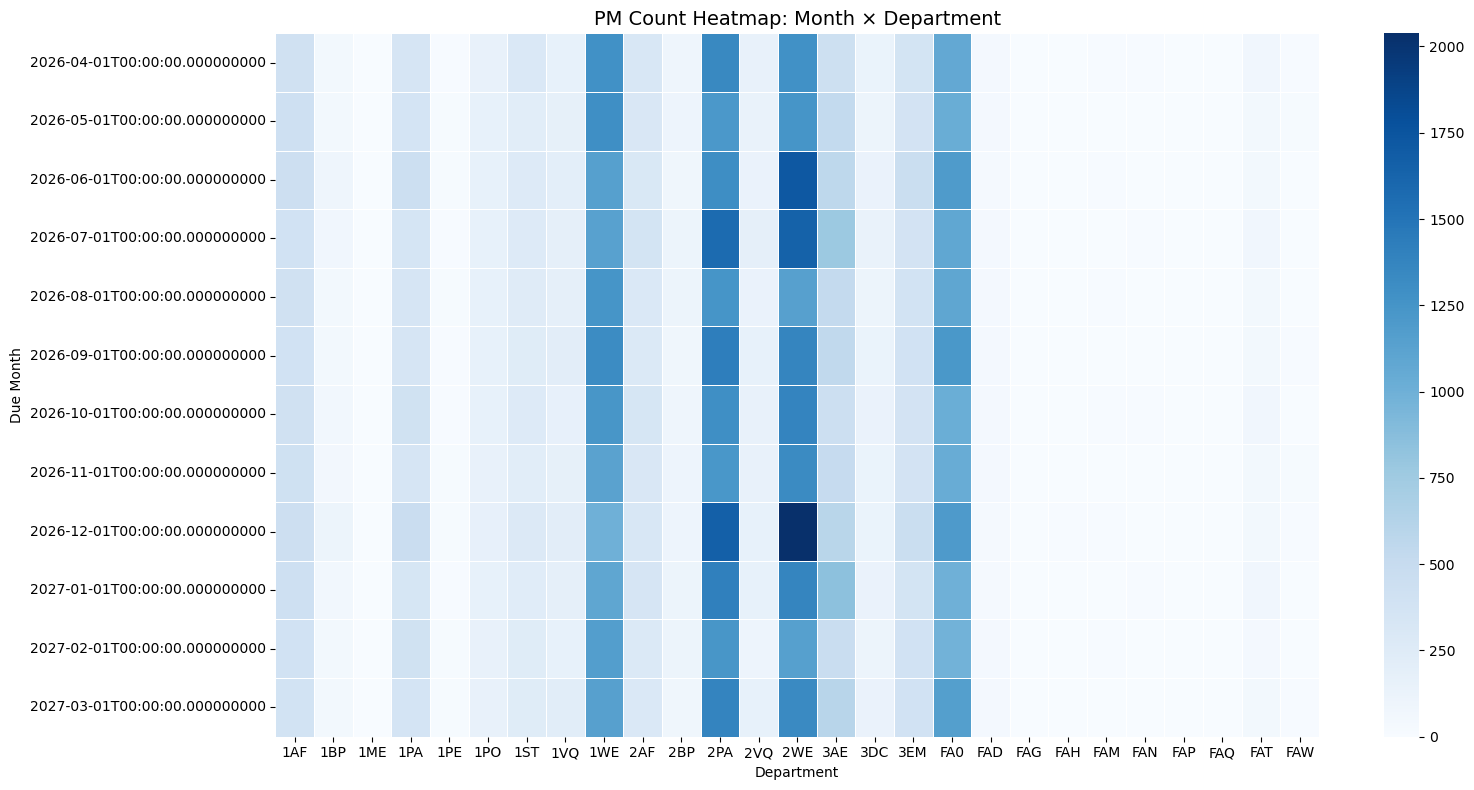

In [37]:
pm_heat = (pf.groupby(['due_month', 'DEPT'], observed=True)
    .size()
    .unstack(fill_value=0))

pm_heat

plt.figure(figsize=(16, 8))
sns.heatmap(pm_heat, cmap='Blues', linewidths=0.5)

plt.title("PM Count Heatmap: Month × Department", fontsize=14)
plt.xlabel("Department")
plt.ylabel("Due Month")
plt.tight_layout()
plt.show()

##### Rolling 3-Month Completion Trend

In [38]:
monthly_perf_roll = (pf.groupby('due_month')['completion_rate']
    .mean()
    .rolling(3)
    .mean()
    .reset_index(name='rolling_completion'))

monthly_perf_roll


,due_month,rolling_completion
0,2026-04-01,NaN
1,2026-05-01,NaN
2,2026-06-01,0.993173
3,2026-07-01,0.993096
4,2026-08-01,0.992539
5,2026-09-01,0.992033
6,2026-10-01,0.991870
7,2026-11-01,0.992218
8,2026-12-01,0.992200
9,2027-01-01,0.991509


## Overall Takeawys 
* Workload Shows Strong Monthly Variability
    * The number of scheduled PMs and total planned labor hours varies  month-to-month.
    * Certain months exhibit high workload density, suggesting seasonal cycles, operating conditions, or planned shutdowns.
    * These workload peaks correspond to stress periods where execution efficiency drops.
* Planning Accuracy is Not Stable Across Time
    * Months with heavier workload show larger negative deviation (actual < planned), meaning work takes less time than predicted.
    * Absolute deviation consistently increases during high-volume periods—indicating planners overestimate labor when schedules are crowded.
    * Meanwhile, low-volume months tend to show tighter planned vs. actual alignment.
* PM Failures Cluster in Specific Months
    * Failing PMs exhibit sharper deviation swings in certain months, especially where planned hours spike.
    * Successful PMs stay consistent across months, but failing PMs show a seasonal performance breakdown.
    * This suggests certain months create structural barriers to executing specific PM types.
* Execution Discipline Varies by Month
    * On-time performance drops in heavy months, even within strong departments.
    * Some departments with strong annual performance still show time periods where lateness temporarily increases.
* Failing vs. Successful PMs React Differently Over Time
    * Successful PMs remain stable across months—low deviation, low variability.
    * Failing PMs become far more erratic during high-load months, with deviation and failure rates rising sharply.
    * Failing PMs are driven more by poor planning and misalignment than by inherent complexity.


### Summary & Next Steps
This Path 2 analysis helps uncover the gap between planned and actual maintenance work.  
Using engineered performance and accuracy metrics, we evaluated:

- How close planned hours match actual execution  
- Which PM groups exhibit planning bias or execution weaknesses  
- Which PMs systematically fail and why  
- Where operational blind spots exist across job types, crafts, and departments  

### Next Steps
- Validate findings with maintenance planners and equipment owners  
- Align forecasting and planning logic with observed execution patterns  
- Use insights to refine PM templates and scheduling processes  
- Integrate findings into the PM dashboard for ongoing monitoring

This analysis provides a data-driven foundation for improving PM strategy and execution across the plant.

* AI Usage
    * Chat GPT
        * Code Building
        * Debugging
        * Understanding Code
        * Code formatting (Best Practices)


In [39]:
file_name = "Path2_analysis"

pf.to_pickle(f"../outputs/{file_name}.pkl")
pf.to_csv(f"../outputs/{file_name}.csv", index=False)

print("Saved:", file_name, "to ../outputs/")


Saved: Path2_analysis to ../outputs/
